Proyecto de Análisis de Datos
============

***Rendimiento Académico*** \
**Autores:**
- *Henri Gerard Gabert Hidalgo - B93096*
- *José Eduardo López Corella - C24343*
- *Juan Pablo Morgan Sandí - C15319*



In [1]:
# Tratamiento de advertencias

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

# Lectura de datos

In [11]:
from ucimlrepo import fetch_ucirepo

  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 

df_mat = pd.read_excel('data/student-mat.xlsx')
df_por = pd.read_excel('data/student-por.xlsx')

# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
print(df_mat)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     reason guardian  traveltime  studytime  failur

In [12]:
pd.set_option('display.max_columns', None)
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Mostrar información de los datos
df_por.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [13]:

df_mat[[df_mat.columns[2], df_mat.columns[-1]]].describe()

,age,G3
count,395.000000,395.000000
mean,16.696203,10.415190
std,1.276043,4.581443
min,15.000000,0.000000
25%,16.000000,8.000000
50%,17.000000,11.000000
75%,18.000000,14.000000
max,22.000000,20.000000


In [ ]:
df_por[[df_por.columns[2], df_por.columns[-1]]].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Funciones de gráficos

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración estética
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# LISTA DE VARIABLES CUANTITATIVAS 
variables_cuantitativas = ['age', 'absences']

# Función para crear gráfico de distribución para una variable
def grafico_distribucion(variable, data):
    plt.figure(figsize=(10, 6))
    
    # Histograma + KDE
    sns.histplot(data[variable], kde=True, color='skyblue', bins=30)
    
    # Añadir línea de media
    mean_val = data[variable].mean()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {mean_val:.2f}')
    
    # Añadir línea de mediana
    median_val = data[variable].median()
    plt.axvline(median_val, color='green', linestyle='--', linewidth=2, 
                label=f'Mediana: {median_val:.2f}')
    
    # Personalización
    plt.title(f'Distribución de {variable}', fontsize=16)
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend()
    plt.show()

<Figure size 1000x600 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumimos que df es tu DataFrame
# df = pd.read_csv('tus_datos.csv')

# Configuración estética
sns.set(style="whitegrid")

# Lista de variables categóricas (reemplaza con las tuyas)
variables_categoricas = ['sex','address', 'famsize', 'Pstatus','Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 
                        'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 
                        'activities','nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'] 

# Función para crear gráficos de distribución categórica
def grafico_categorico(variable, dff, max_categorias=10):
    # Crear figura con dos subplots
    plt.figure(figsize=(15, 6))
    
    # Gráfico de barras (countplot)
    plt.subplot(1, 2, 1)
    if dff[variable].nunique() > max_categorias:
        # Si hay muchas categorías, mostrar solo las principales
        top_categories = dff[variable].value_counts().nlargest(max_categorias).index
        data = dff[dff[variable].isin(top_categories)]
        sns.countplot(data=data, y=variable, order=top_categories, palette="viridis")
        plt.title(f'Top {max_categorias} categorías de {variable}')
    else:
        sns.countplot(data=dff, y=variable, palette="viridis")
        plt.title(f'Distribución de {variable}')
    plt.xlabel('Frecuencia')
    
    # Gráfico de torta (solo si no hay muchas categorías)
    plt.subplot(1, 2, 2)
    if dff[variable].nunique() <= 8:  # Solo hacer pie chart para pocas categorías
        counts = dff[variable].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette("pastel"))
        plt.title(f'Proporción de {variable}')
        plt.axis('equal')  # Para que el círculo sea perfecto
    else:
        plt.text(0.5, 0.5, f'Demasiadas categorías\n({dff[variable].nunique()})', 
                ha='center', va='center')
        plt.axis('off')  # Ocultar ejes
    
    plt.tight_layout()
    plt.show()



# Gráficos

## Gráficos para matemáticas

### Gráficos de distribución

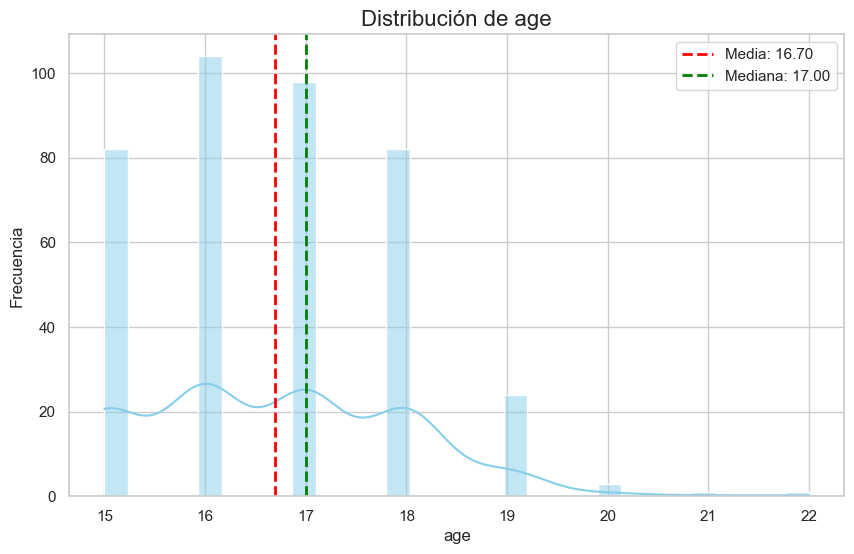

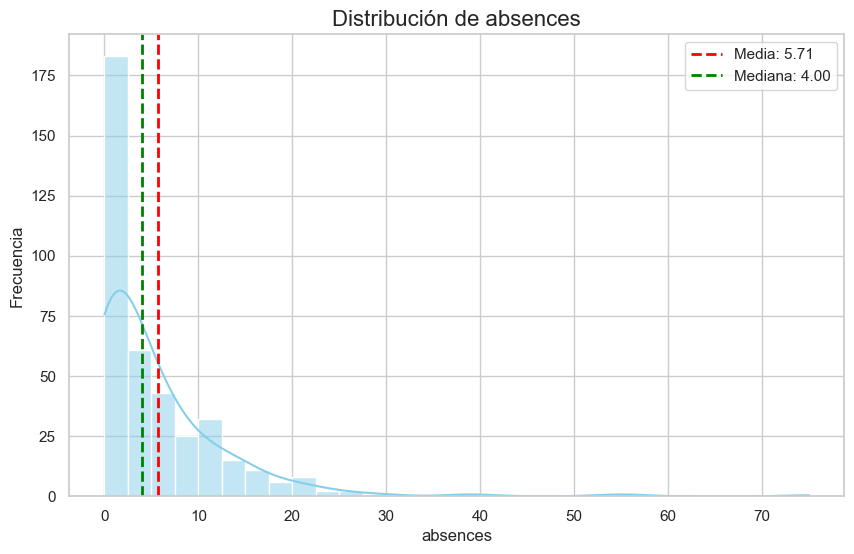

In [19]:
# Ejemplo de uso (para cada variable)
for variable in variables_cuantitativas:
    grafico_distribucion(variable, df_mat)

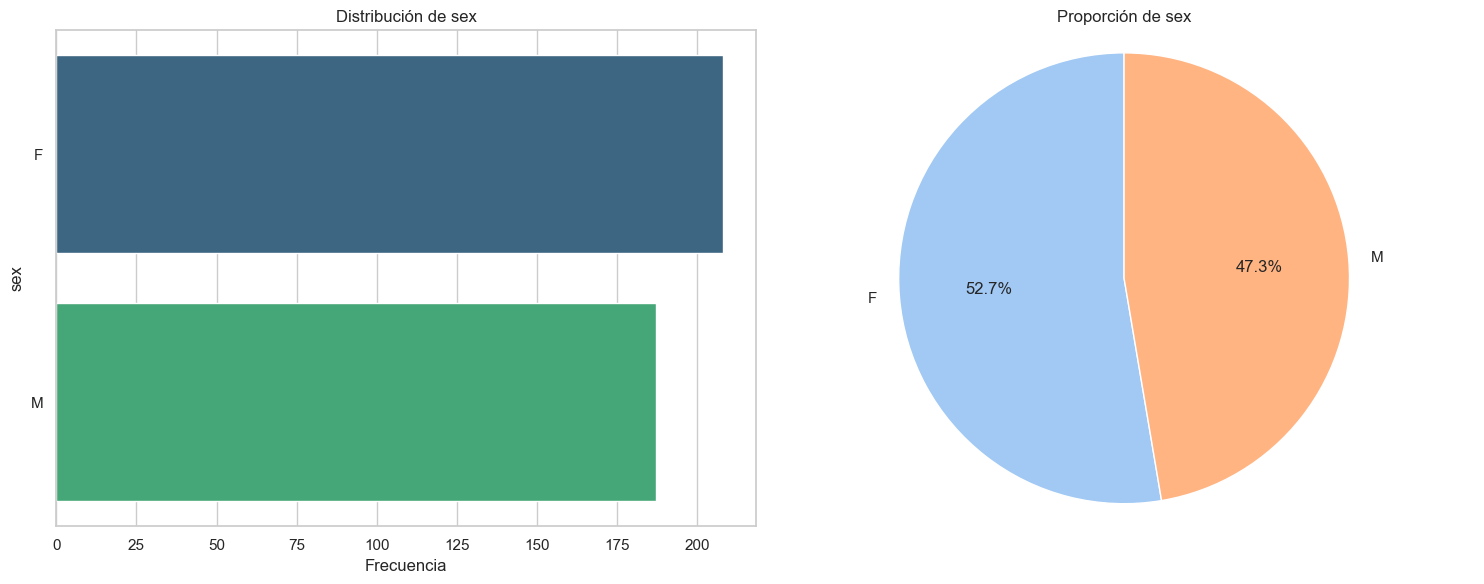

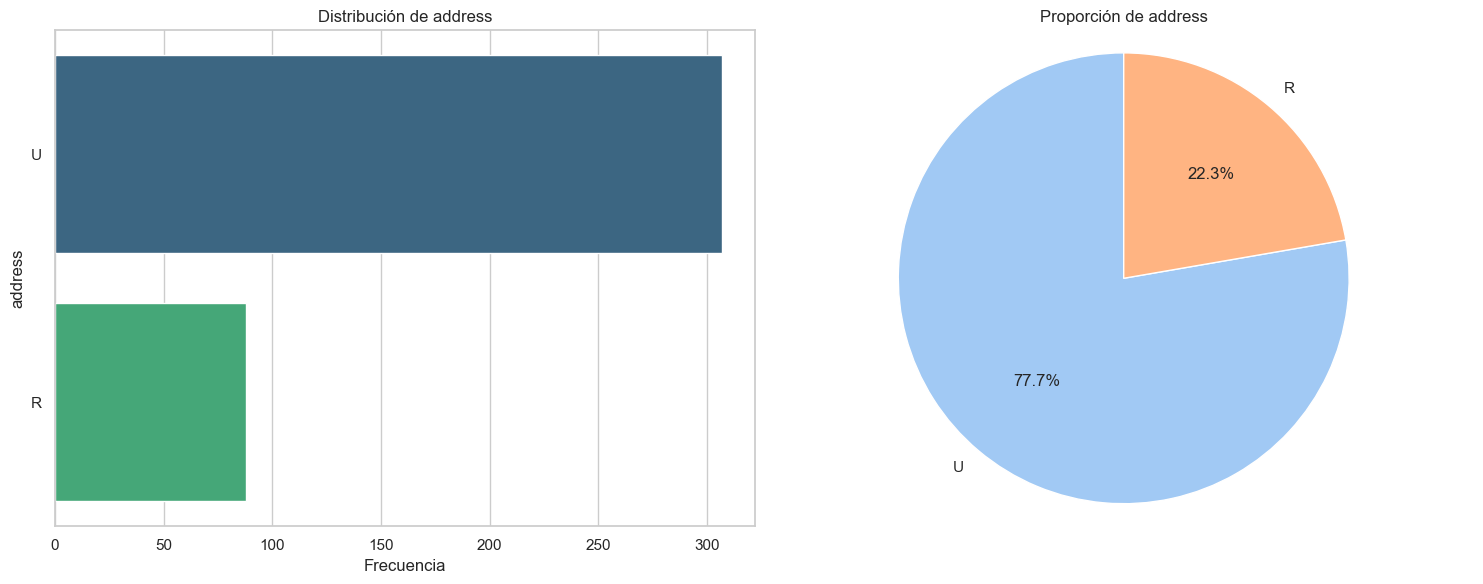

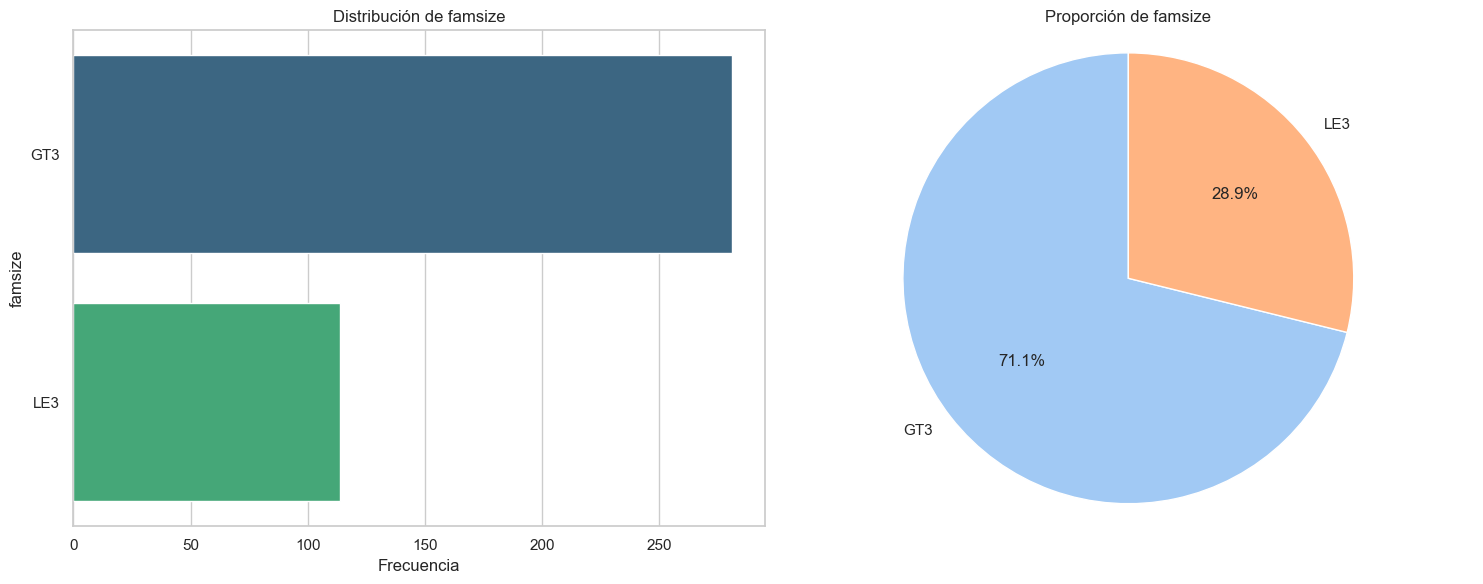

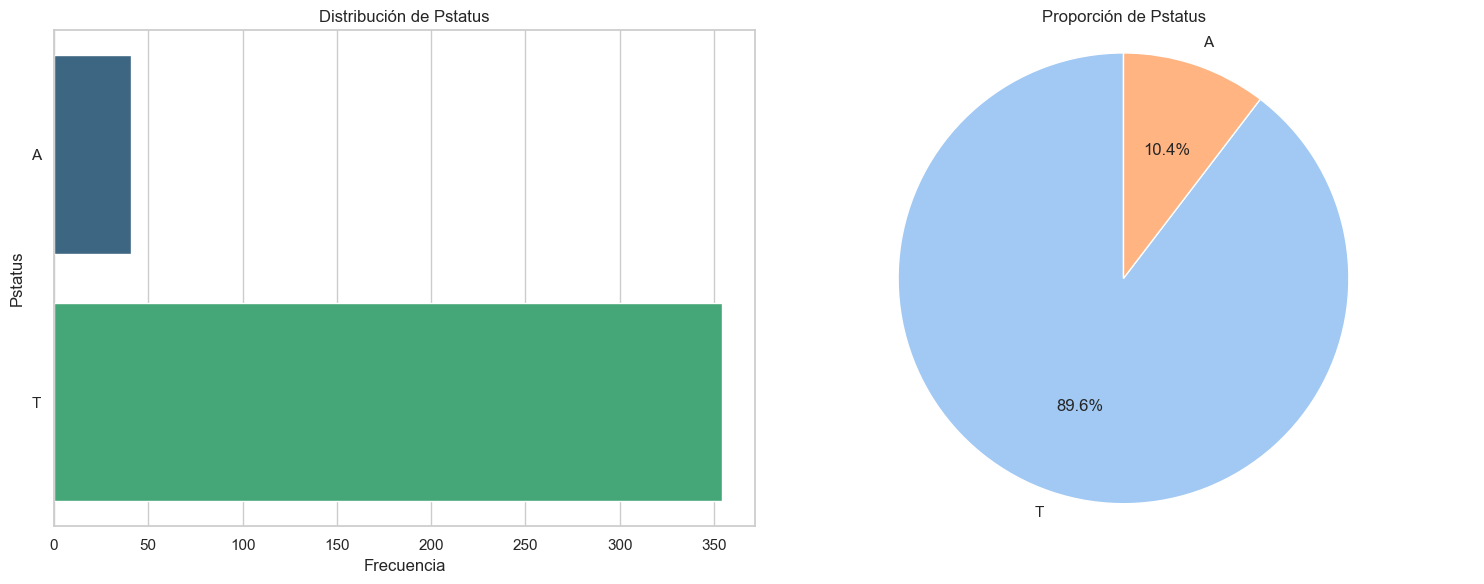

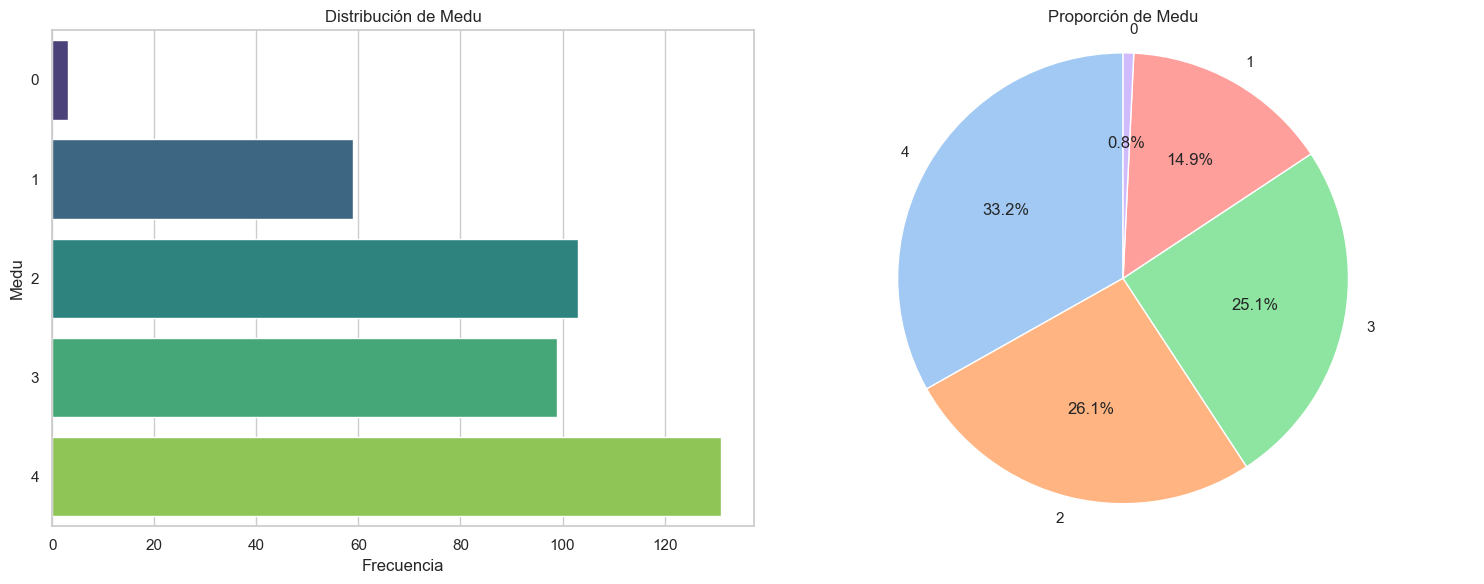

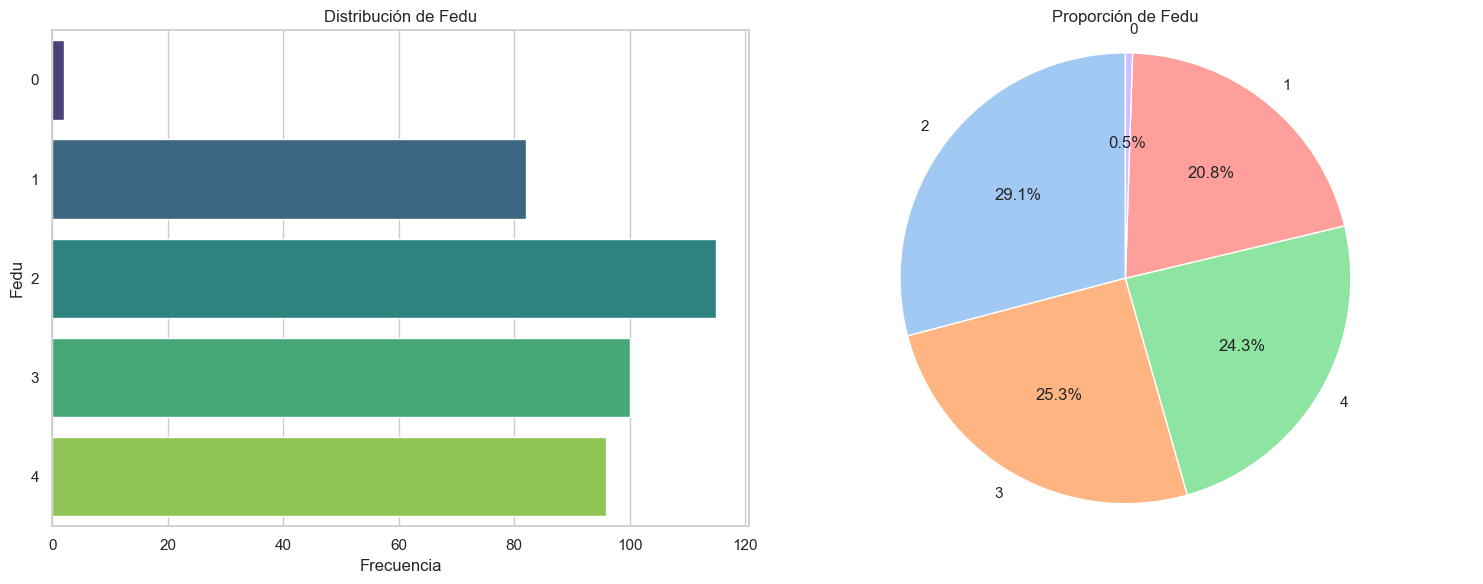

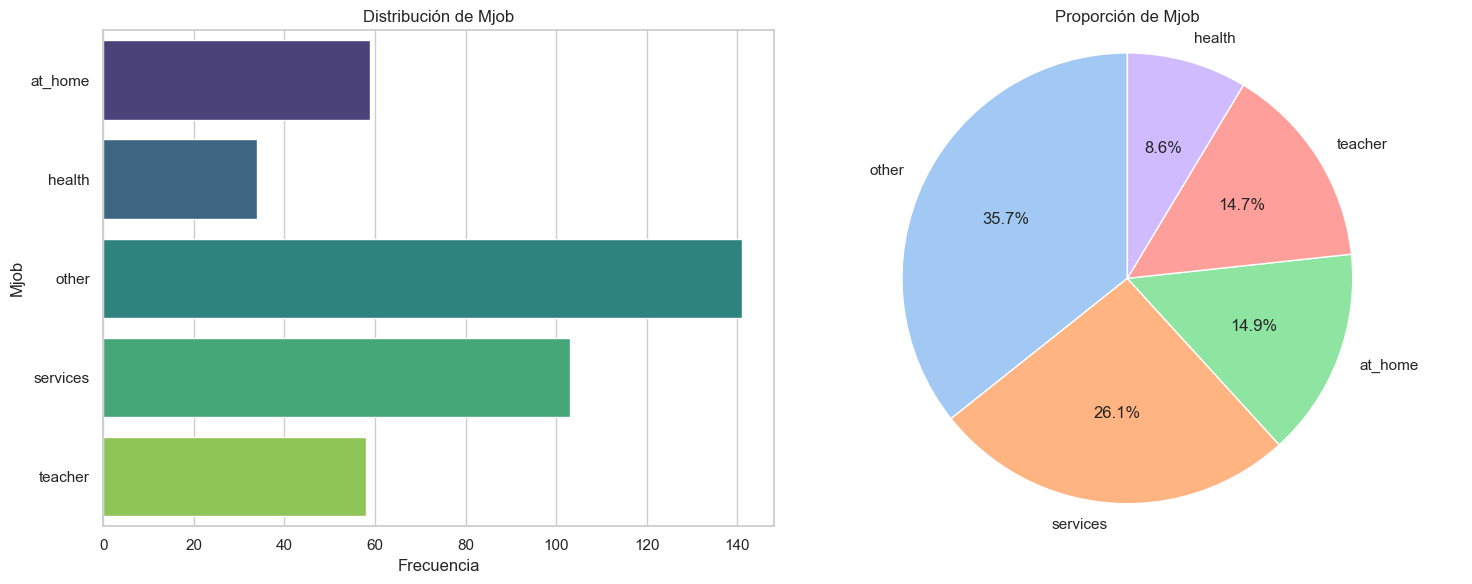

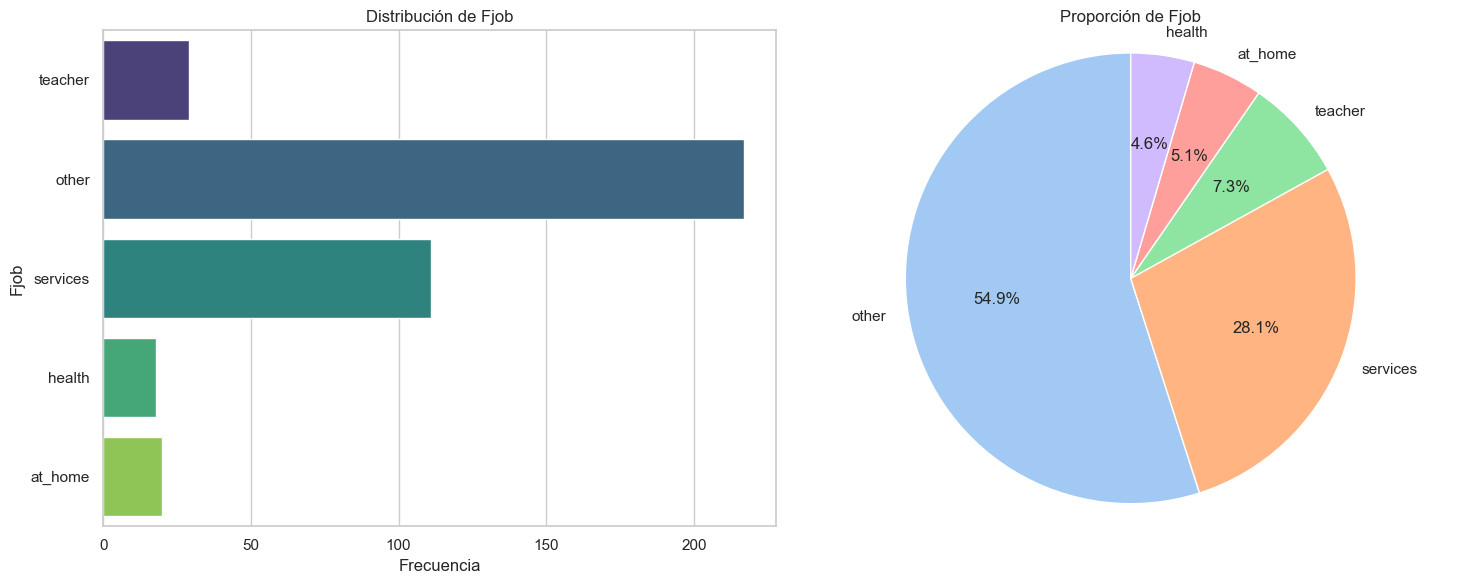

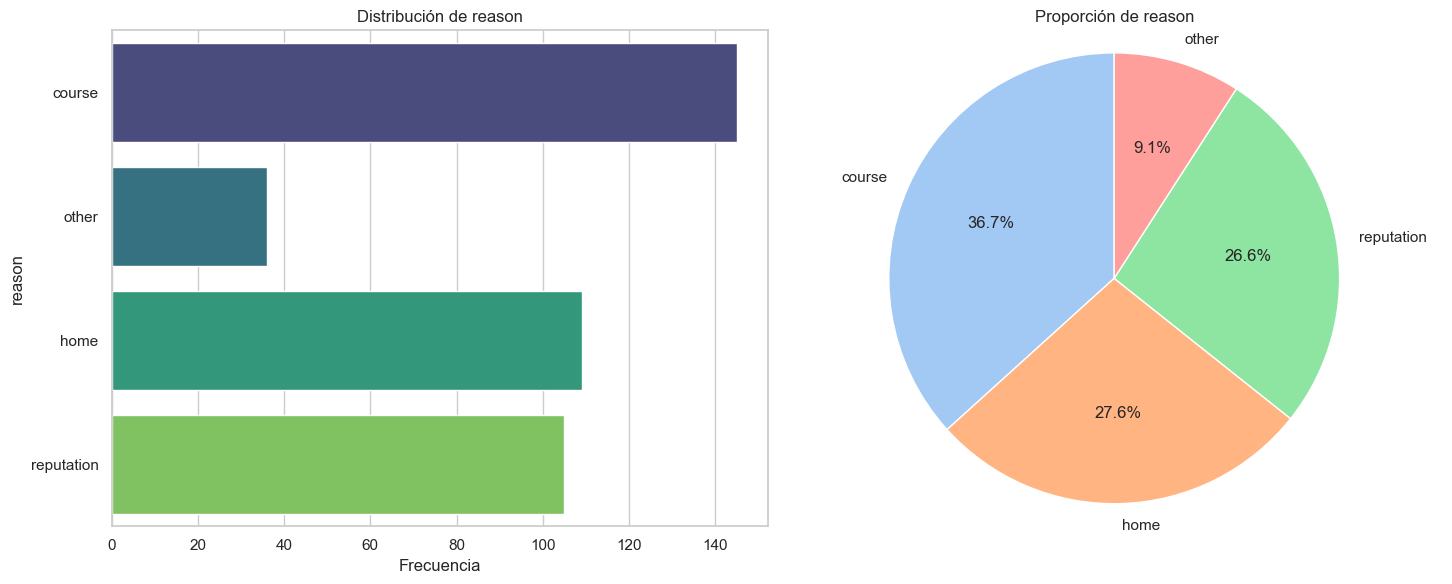

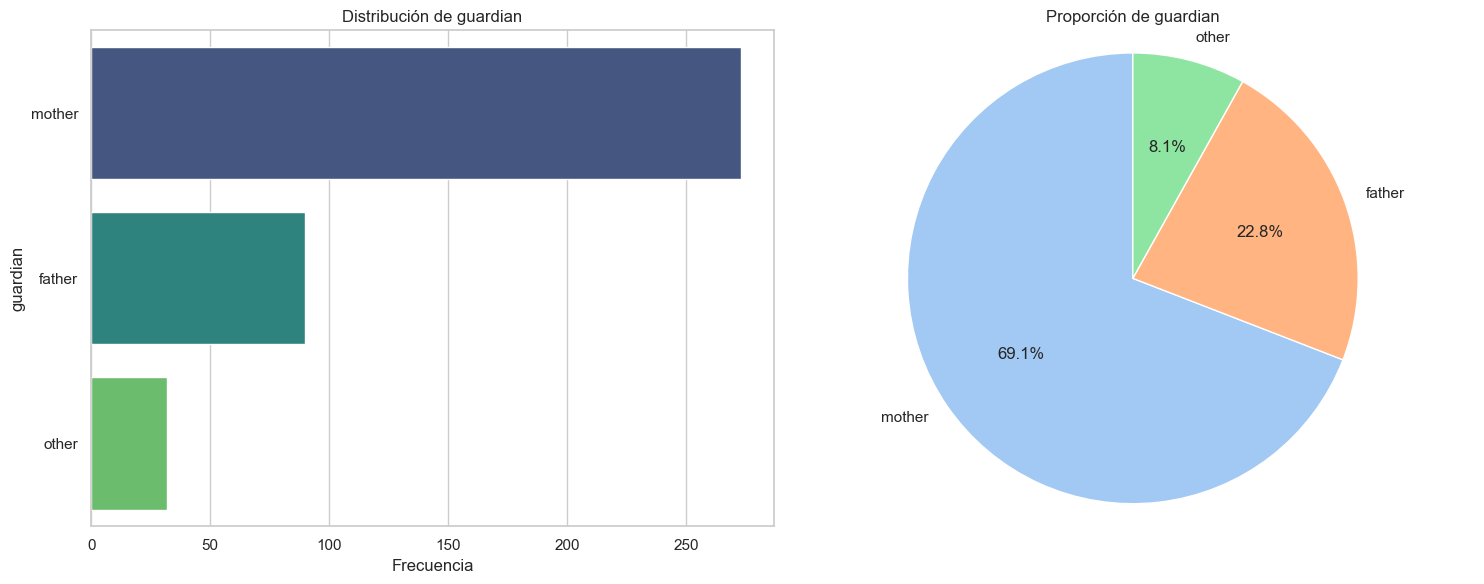

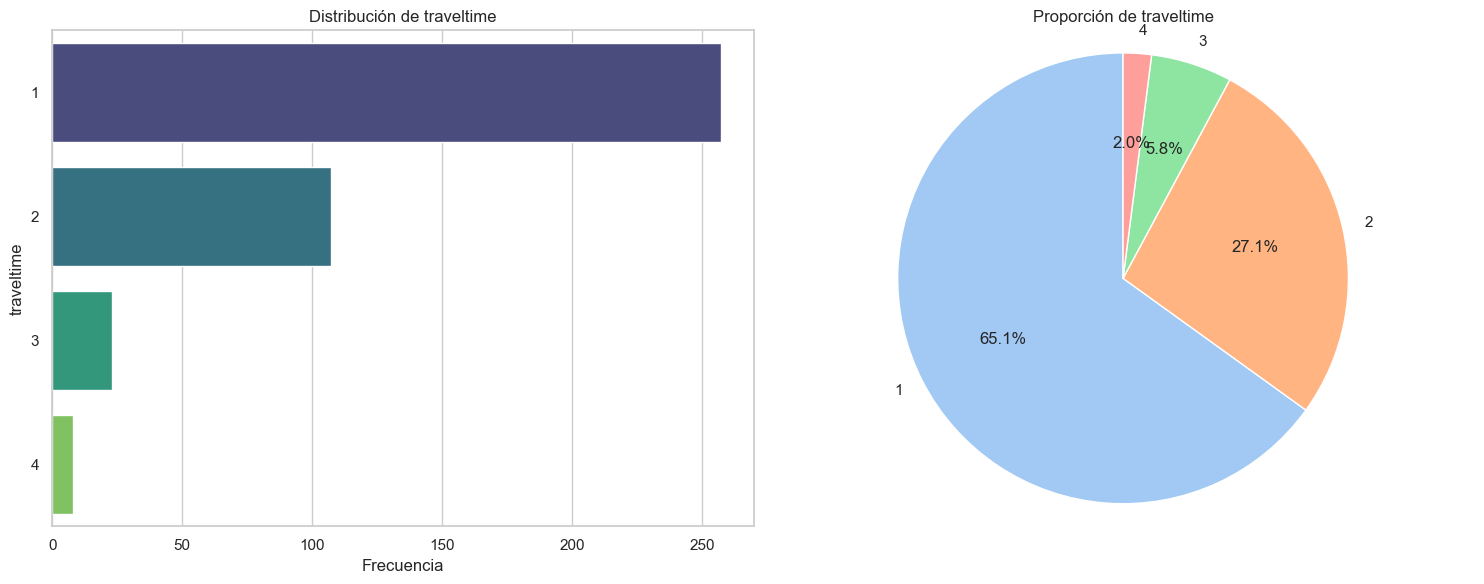

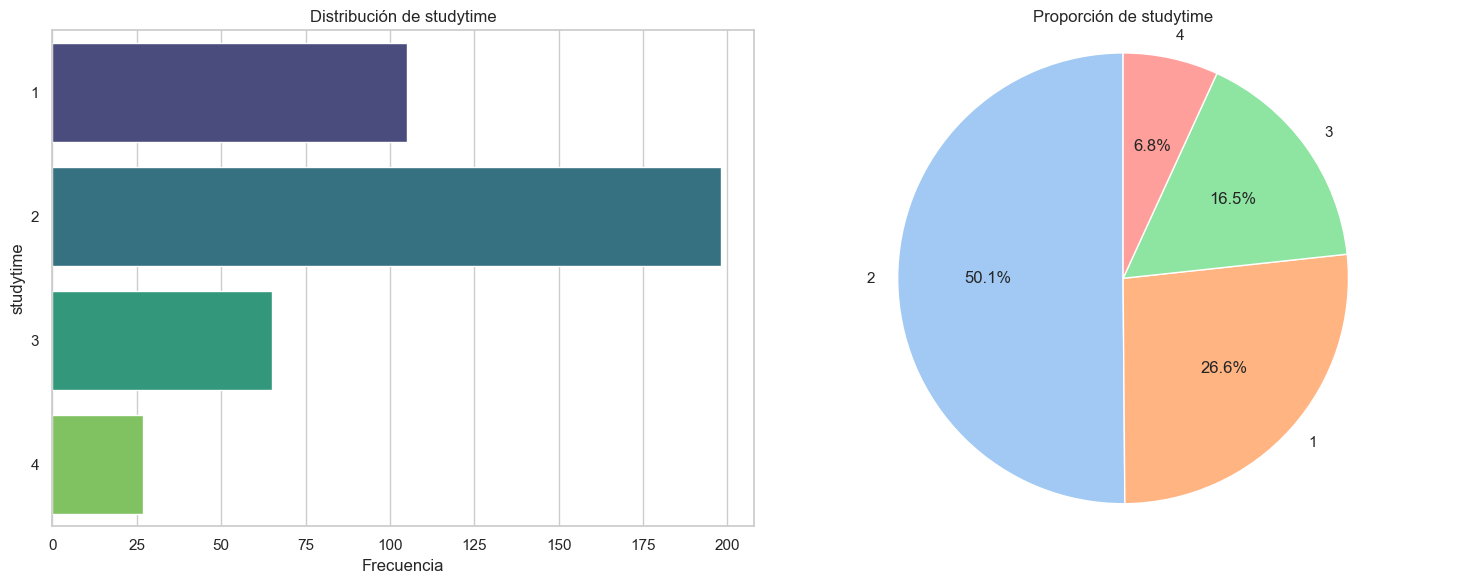

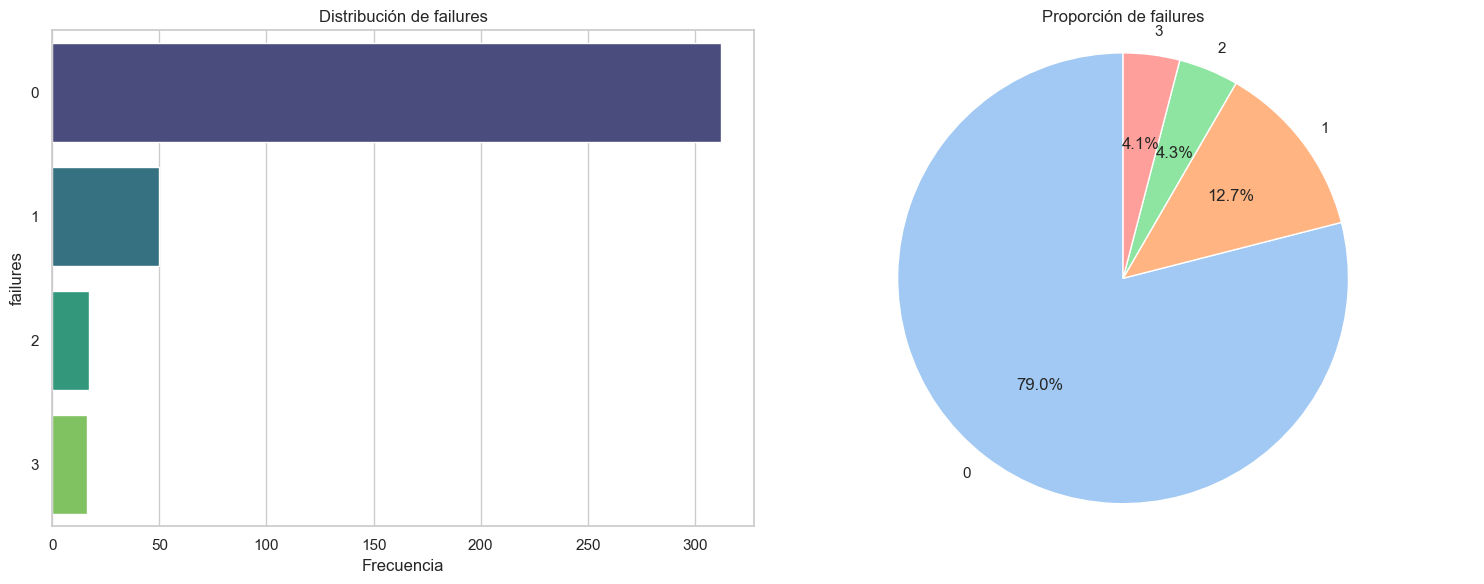

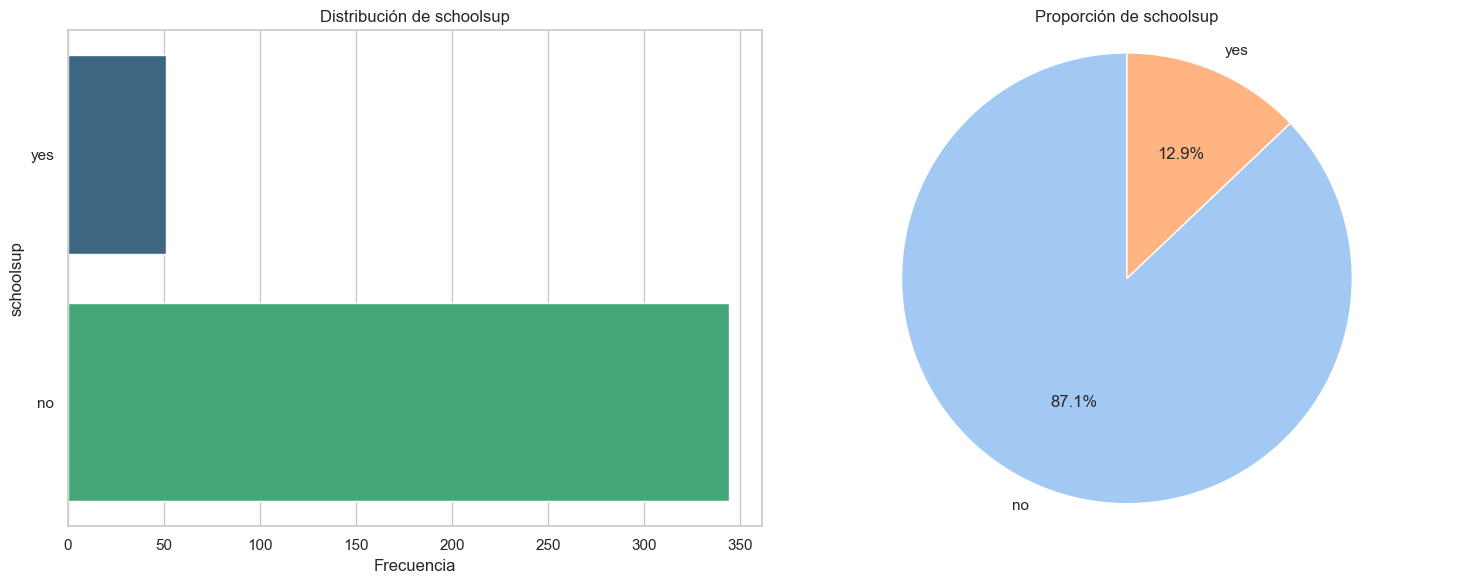

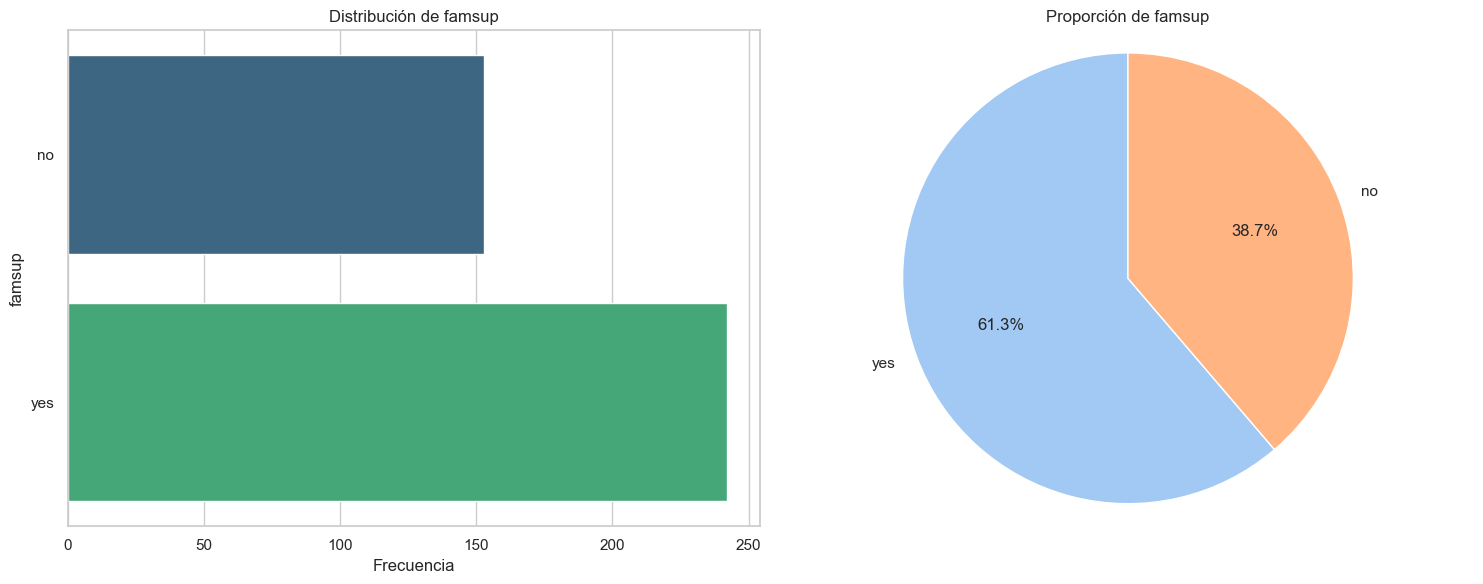

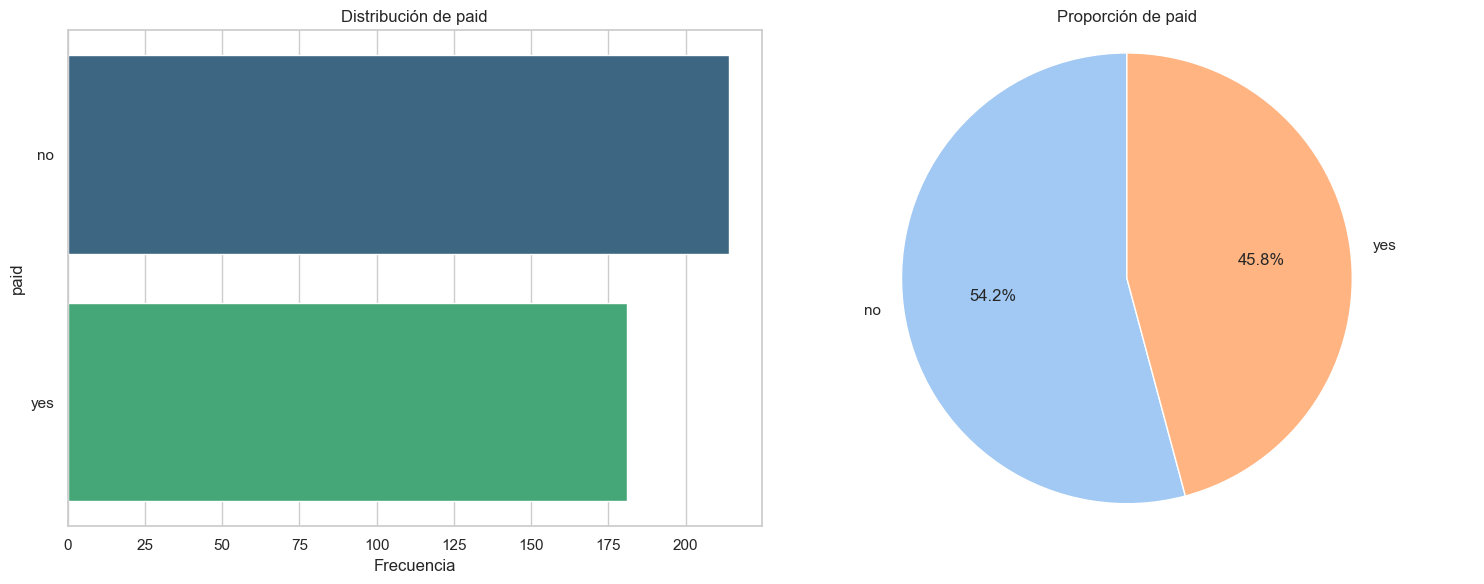

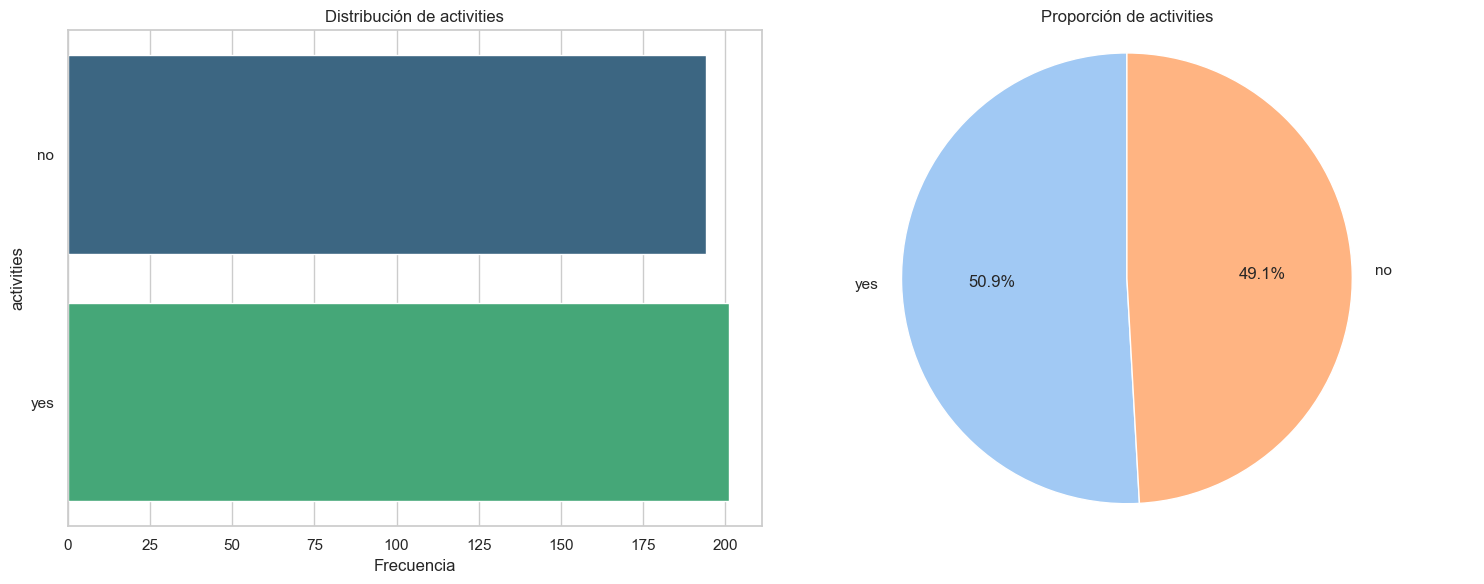

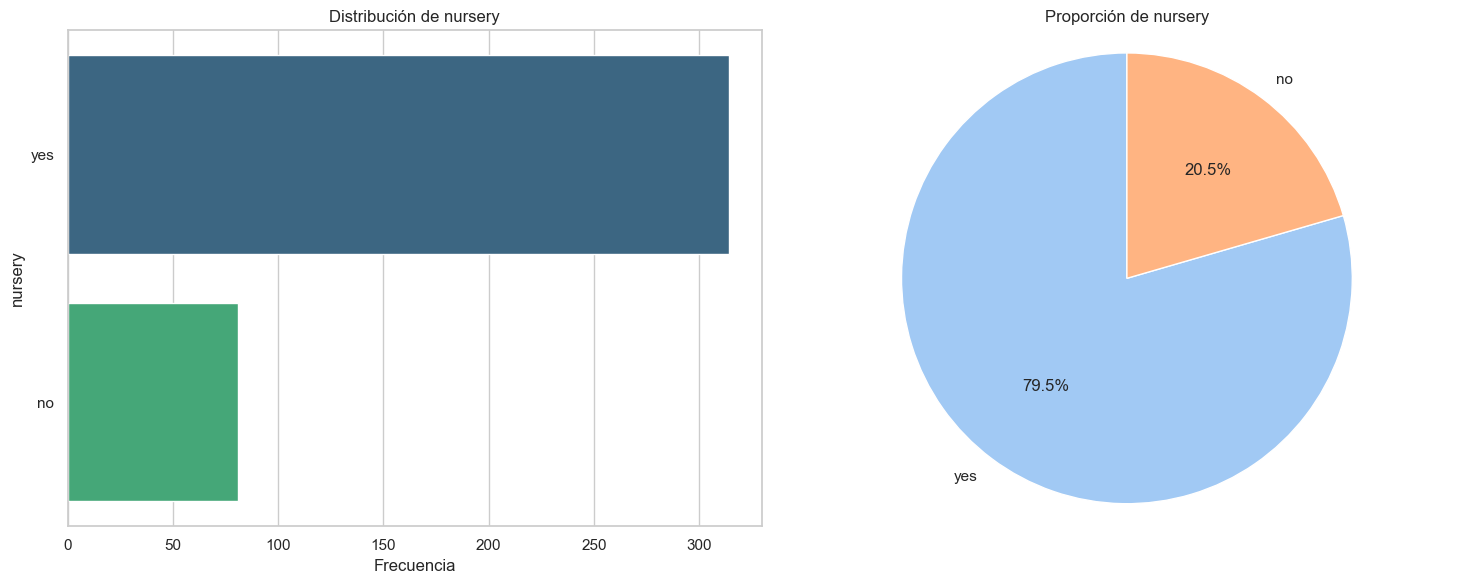

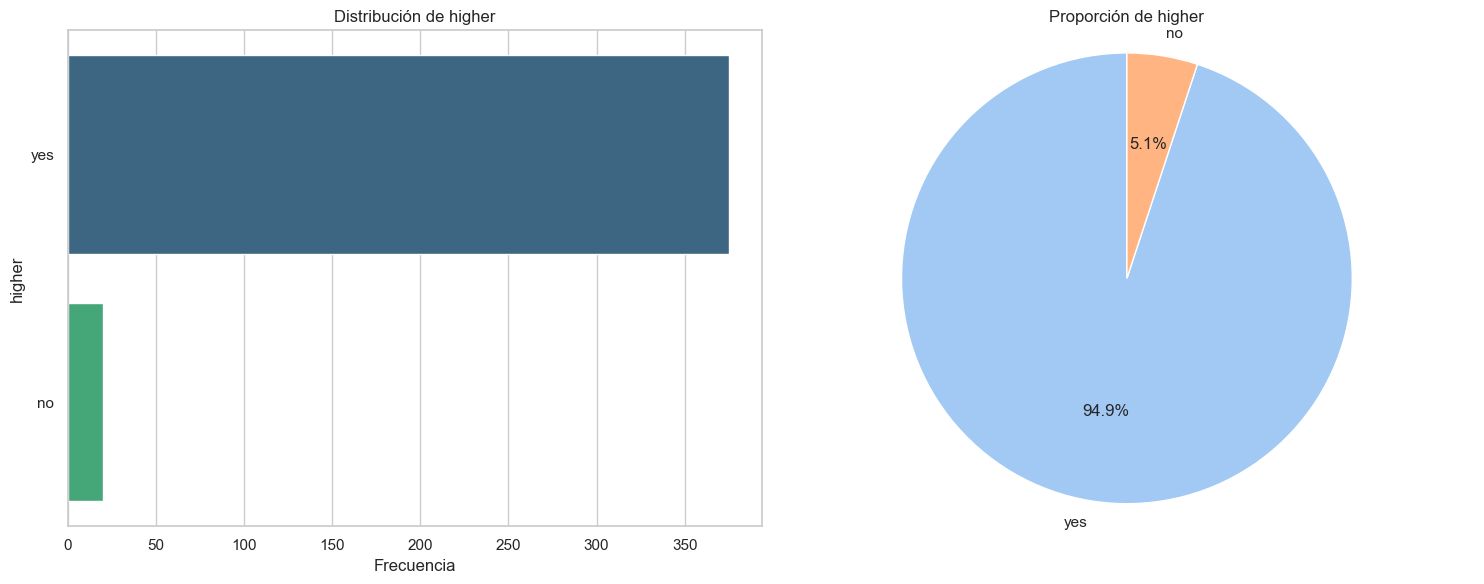

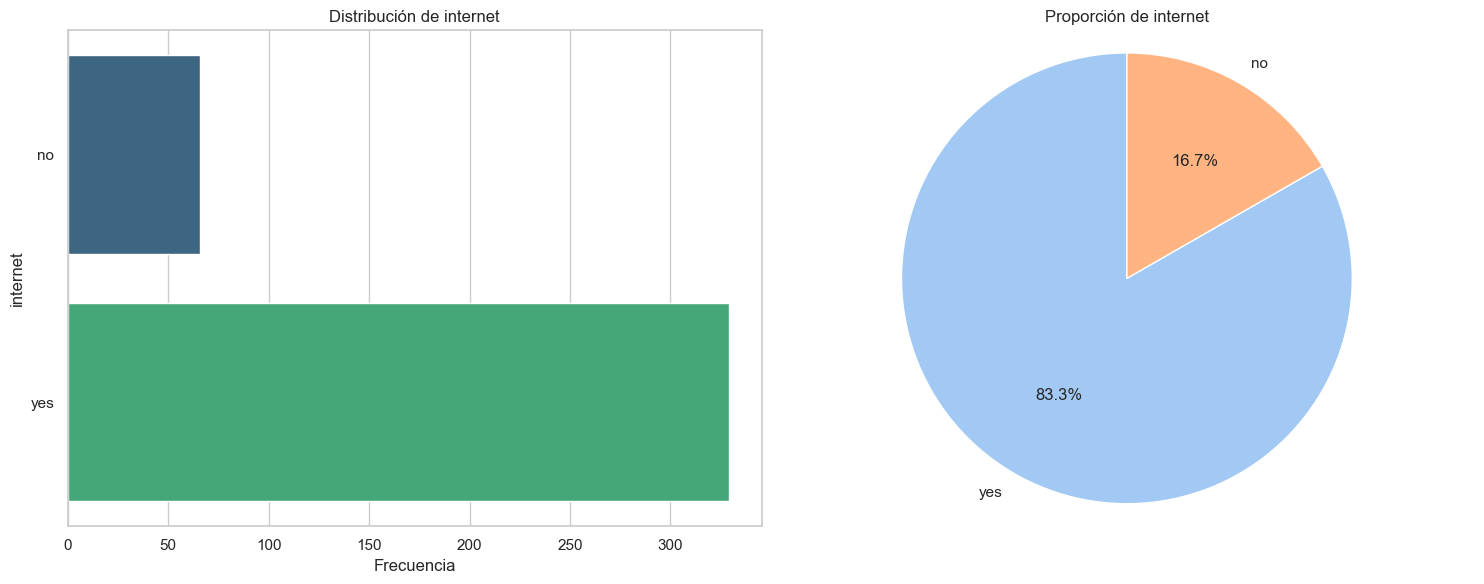

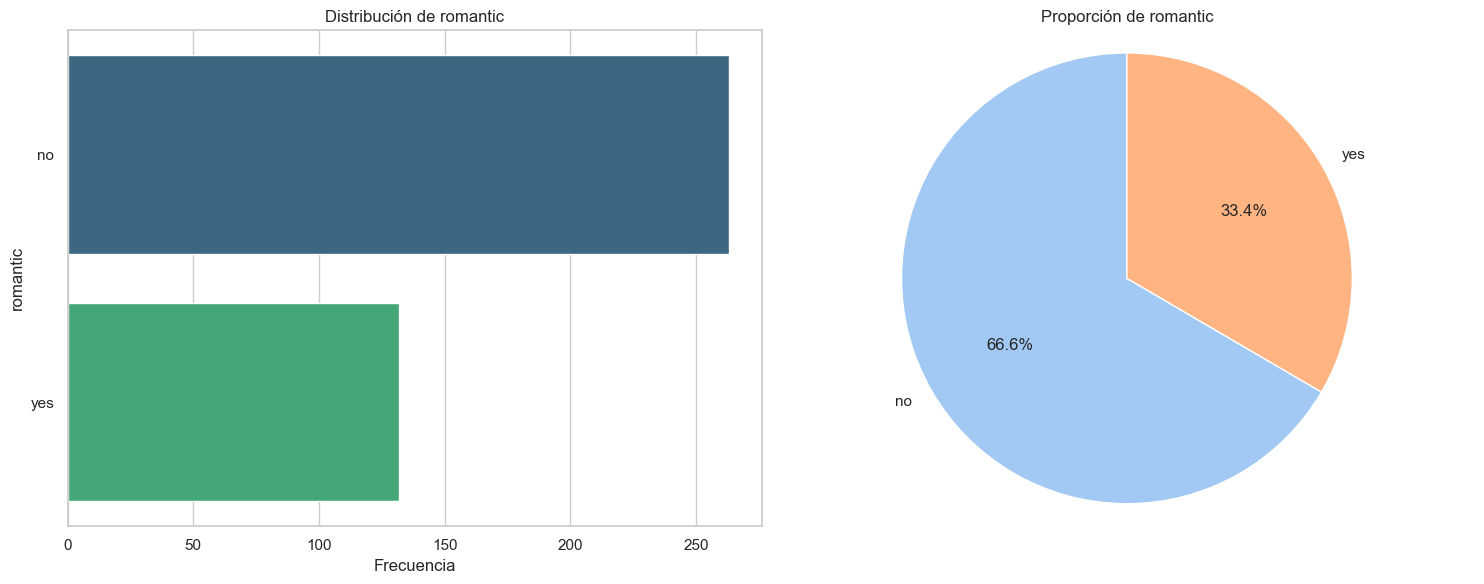

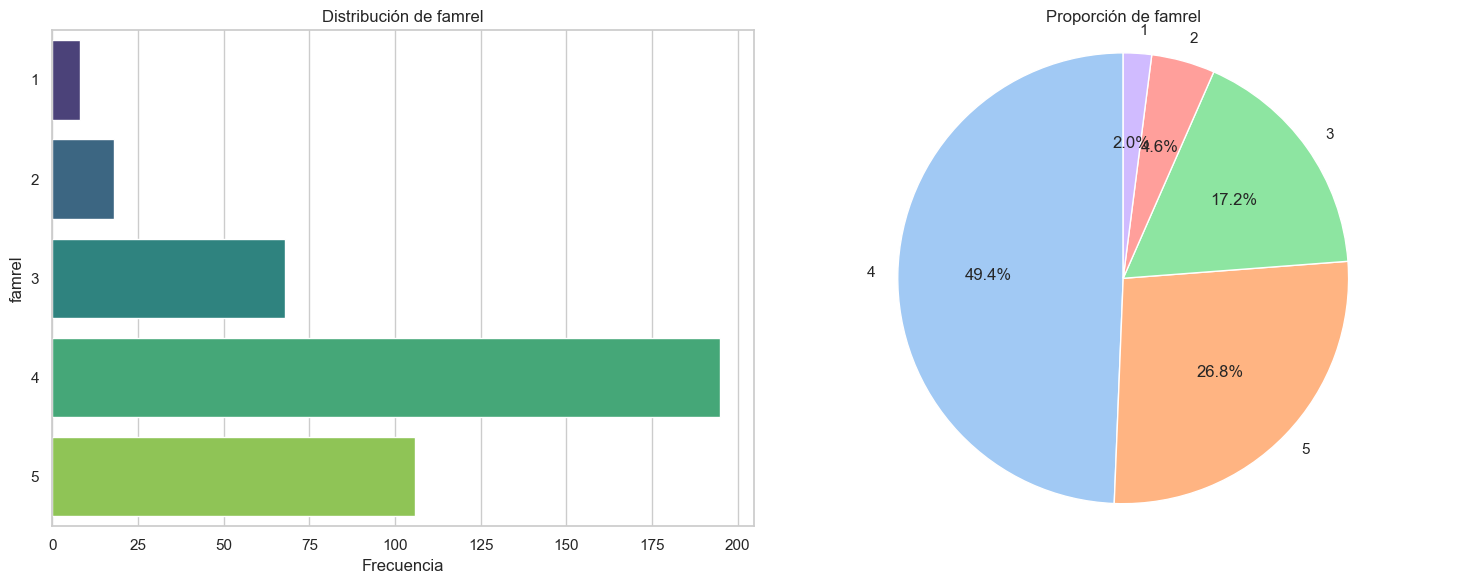

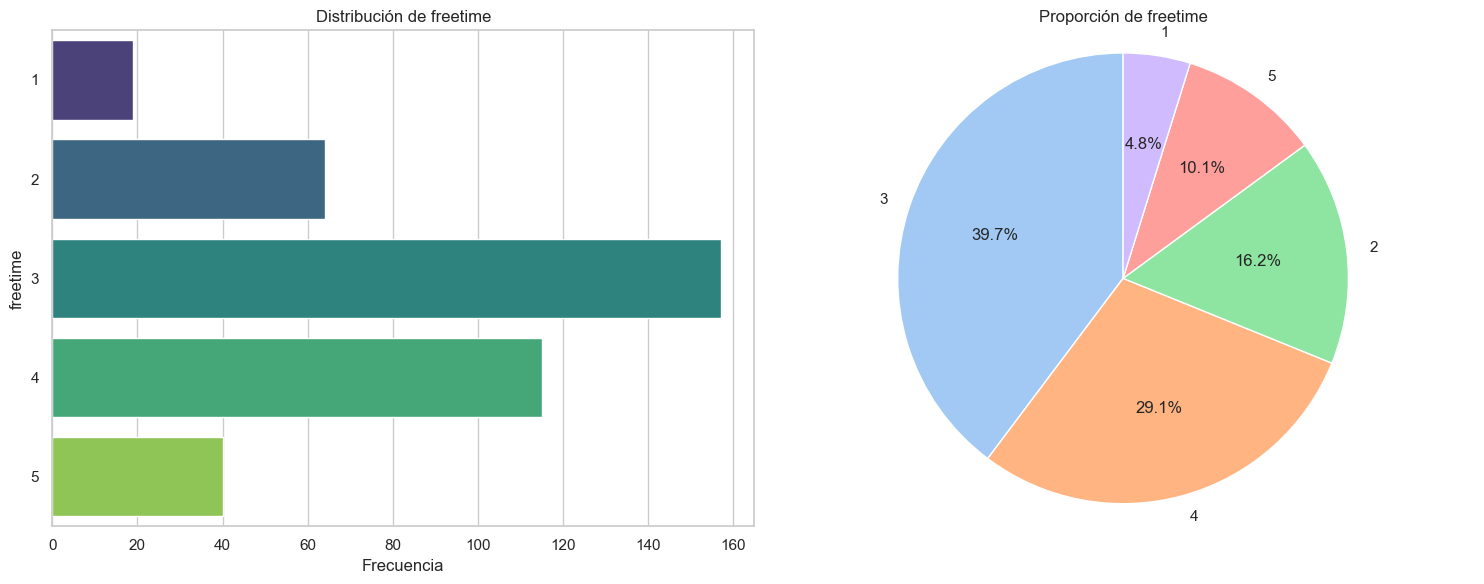

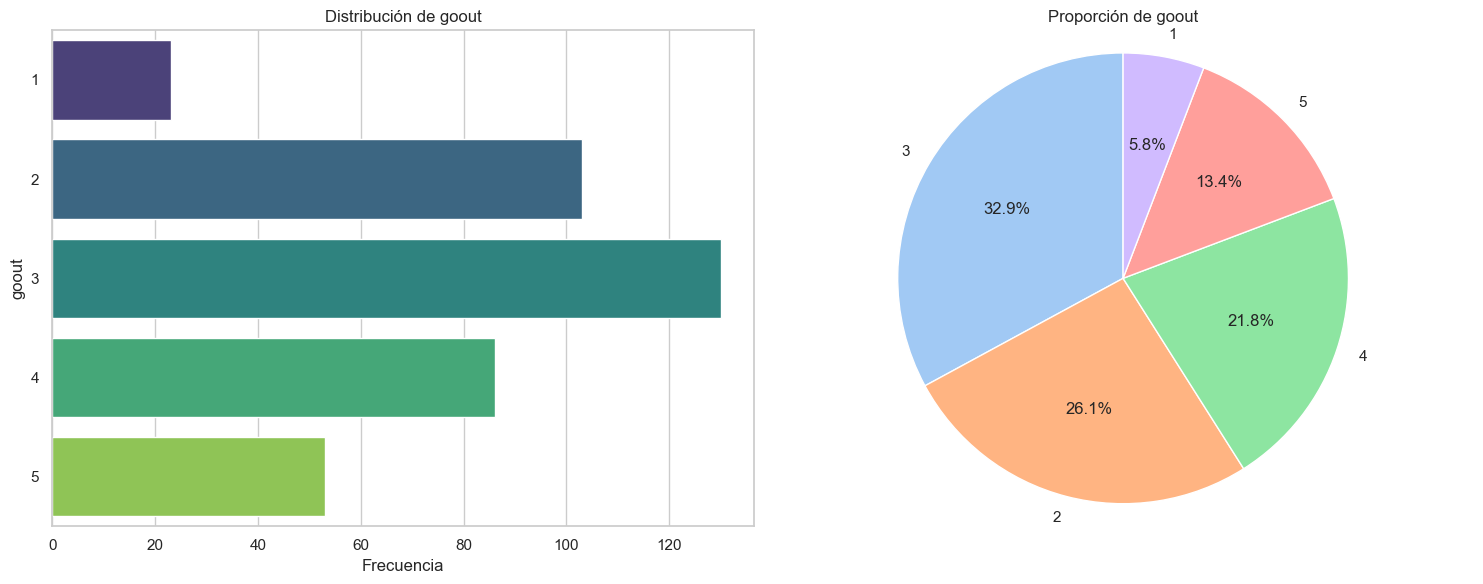

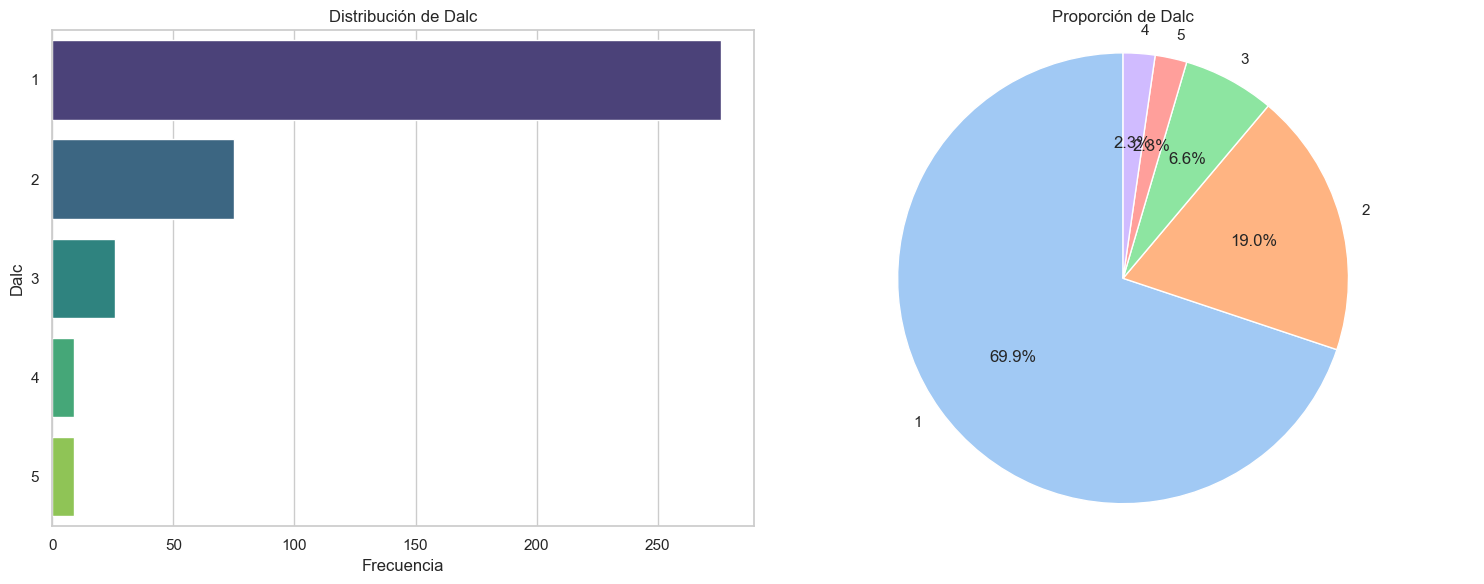

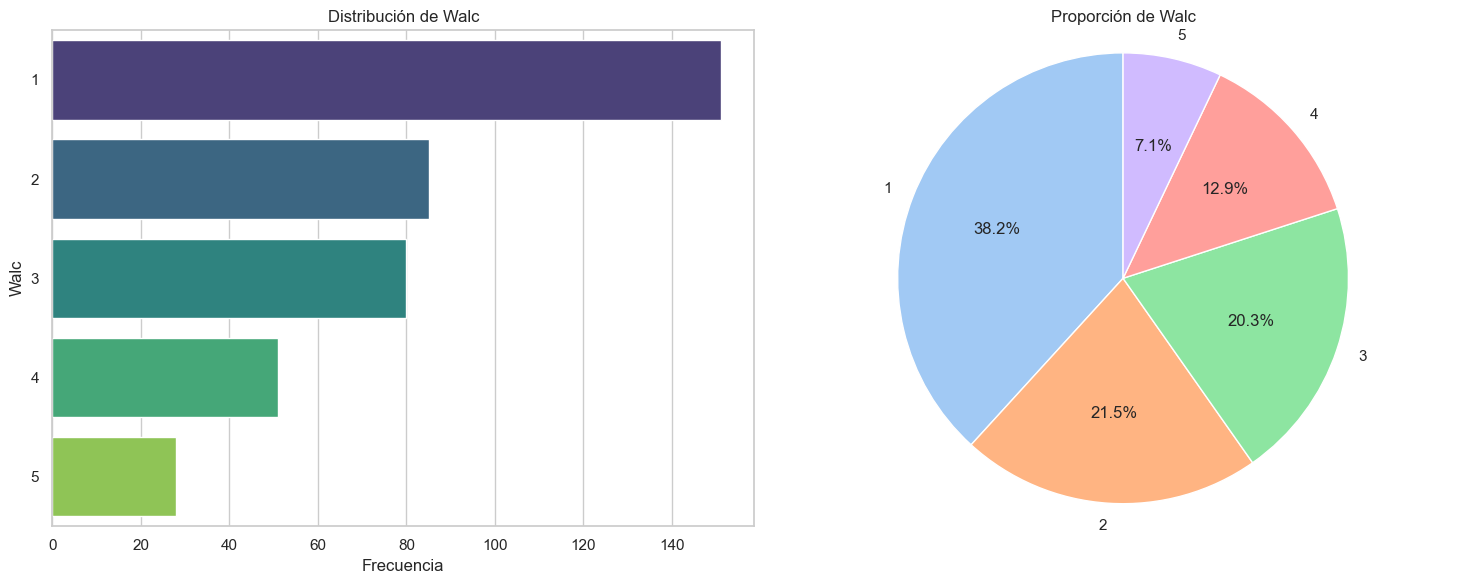

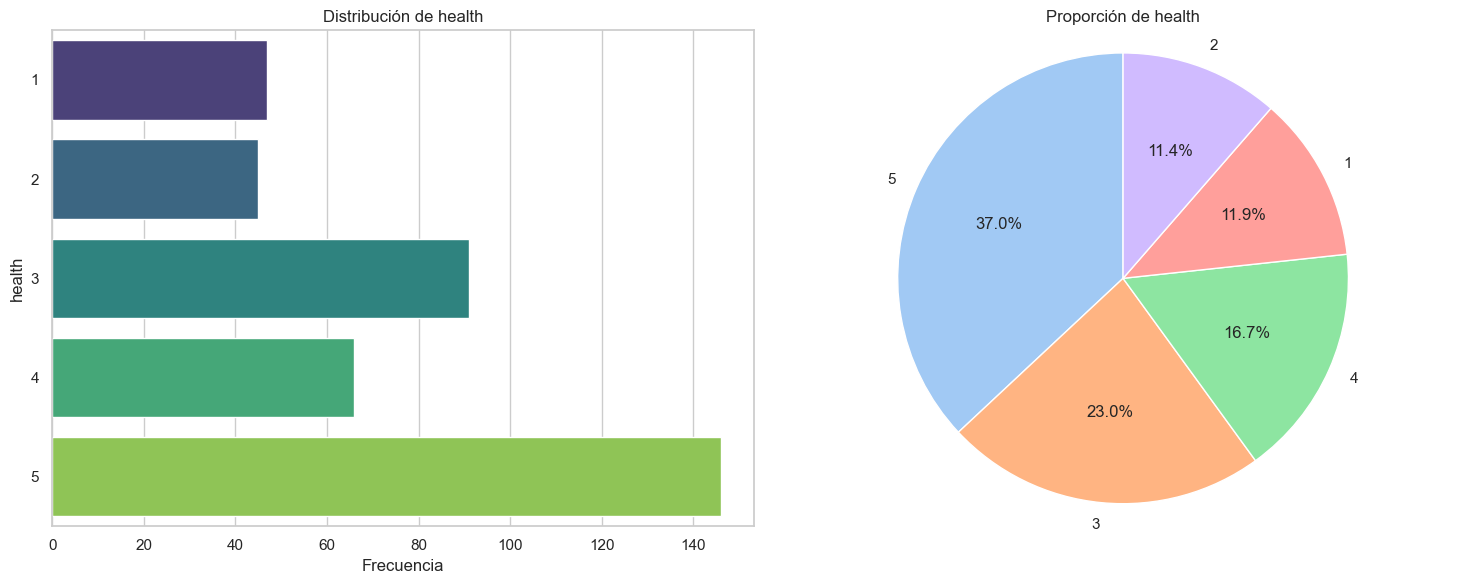

In [20]:
# Ejemplo de uso para cada variable categórica
for variable in variables_categoricas:
    grafico_categorico(variable, df_mat)

### Gráficos de relación

<Figure size 1000x600 with 0 Axes>

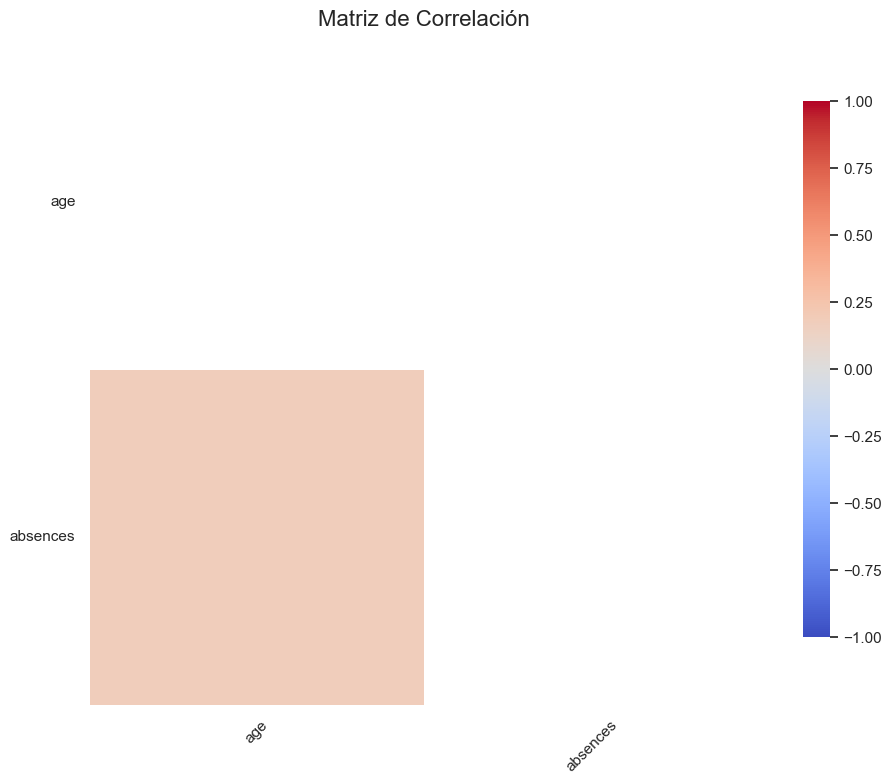

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuración
sns.set(style="white")
plt.figure(figsize=(10, 6))

# --- 1. MATRIZ DE CORRELACIÓN (Para variables cuantitativas) ---
def matriz_correlacion(df, variables_cuantitativas):
    # Calcular matriz de correlación
    corr_matrix = df[variables_cuantitativas].corr(method='pearson')  # También puede ser 'spearman' o 'kendall'
    
    # Máscara para el triángulo superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                fmt=".2f", 
                cmap="coolwarm",
                vmin=-1, 
                vmax=1,
                center=0,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .8})
    
    plt.title("Matriz de Correlación", fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

matriz_correlacion(df_mat, variables_cuantitativas)

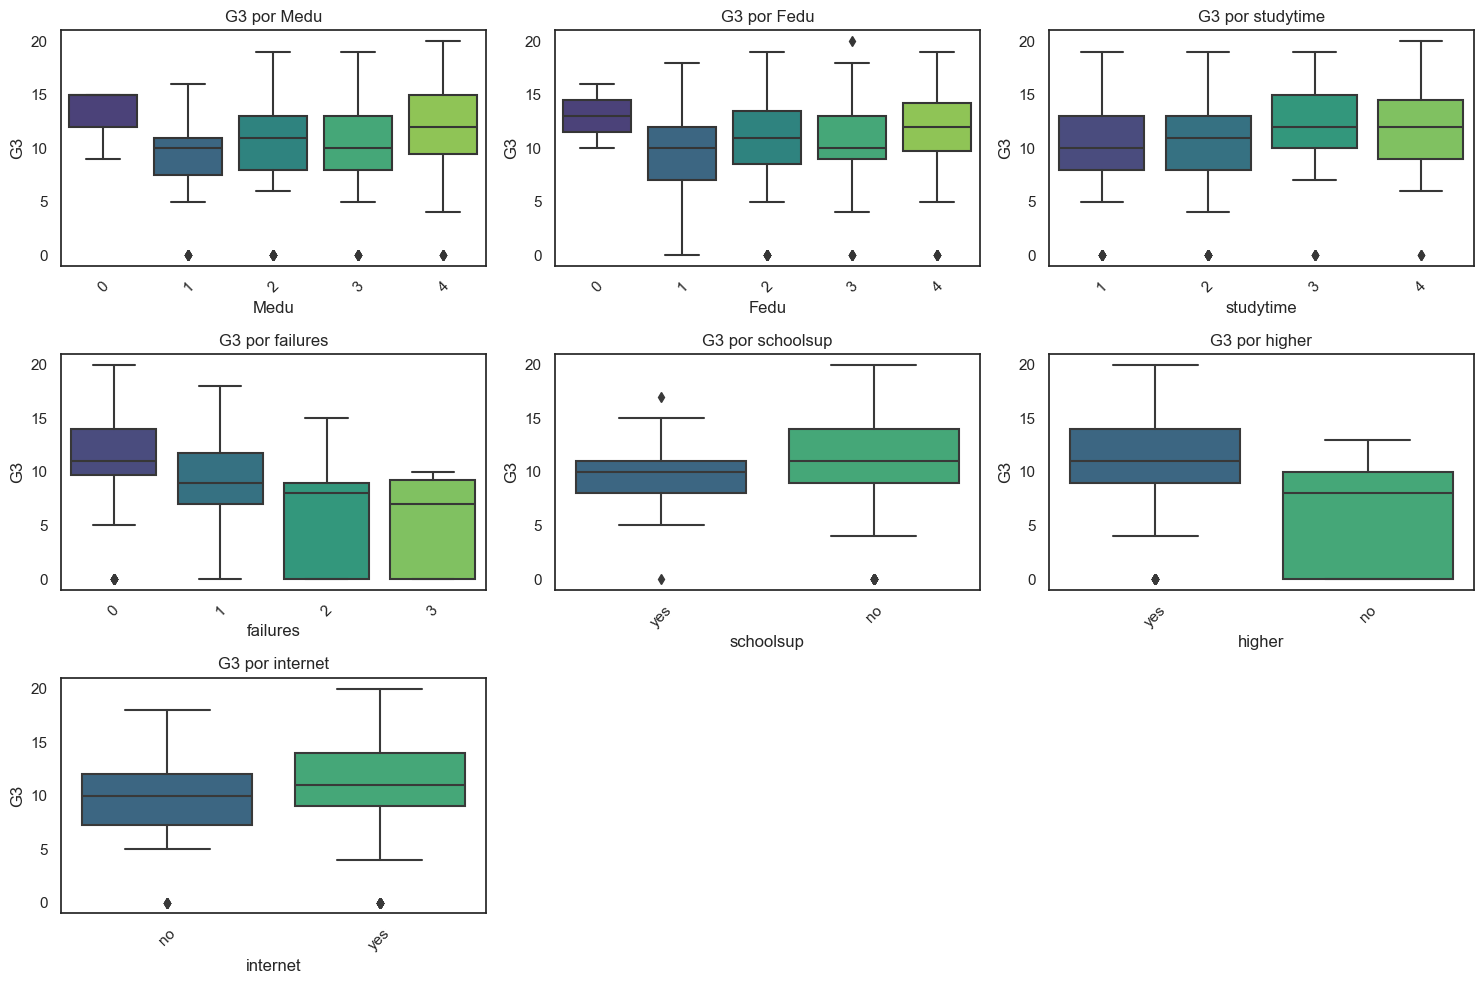

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables clave vs G3 (nota final)
variables_interes = ['Medu', 'Fedu', 'studytime', 'failures', 'schoolsup', 'higher', 'internet']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_interes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_mat, x=var, y='G3', palette='viridis')
    plt.title(f'G3 por {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

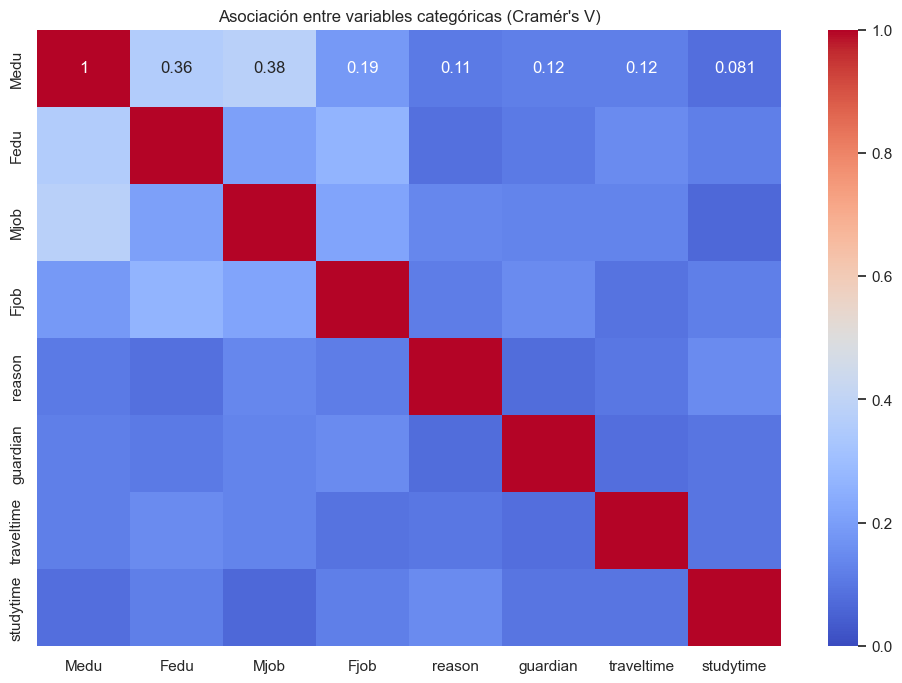

In [23]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))

# Seleccionar categóricas (excluyendo binarias para simplificar)
categoricas = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime']

# Matriz de Cramér's V
corr_matrix = pd.DataFrame(index=categoricas, columns=categoricas)
for col1 in categoricas:
    for col2 in categoricas:
        corr_matrix.loc[col1, col2] = cramers_v(df_mat[col1], df_mat[col2])

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Asociación entre variables categóricas (Cramér's V)")
plt.show()

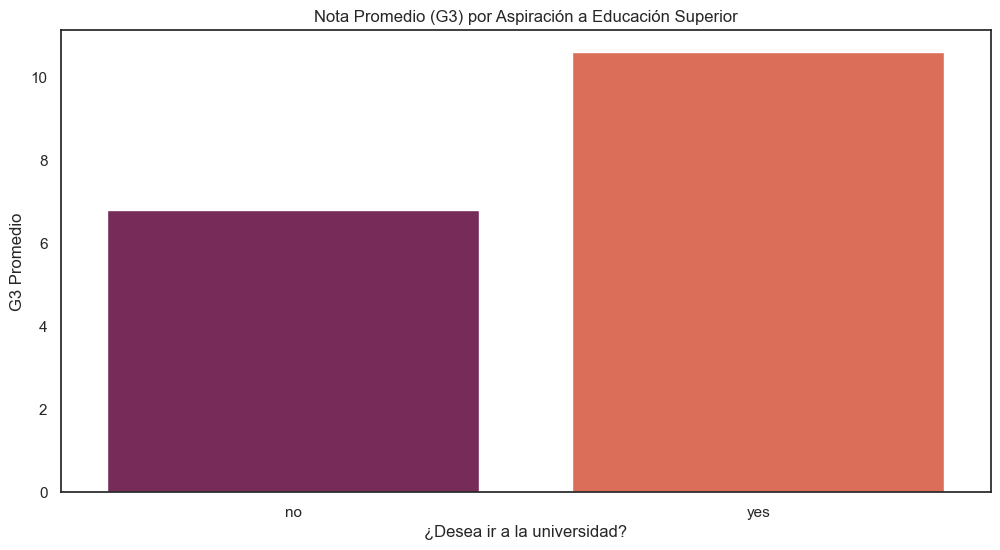

In [24]:
binarias = ['schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic']

plt.figure(figsize=(12, 6))
df_grouped = df_mat.groupby('higher')['G3'].mean().reset_index()
sns.barplot(data=df_grouped, x='higher', y='G3', palette='rocket')
plt.title("Nota Promedio (G3) por Aspiración a Educación Superior")
plt.ylabel("G3 Promedio")
plt.xlabel("¿Desea ir a la universidad?")
plt.show()

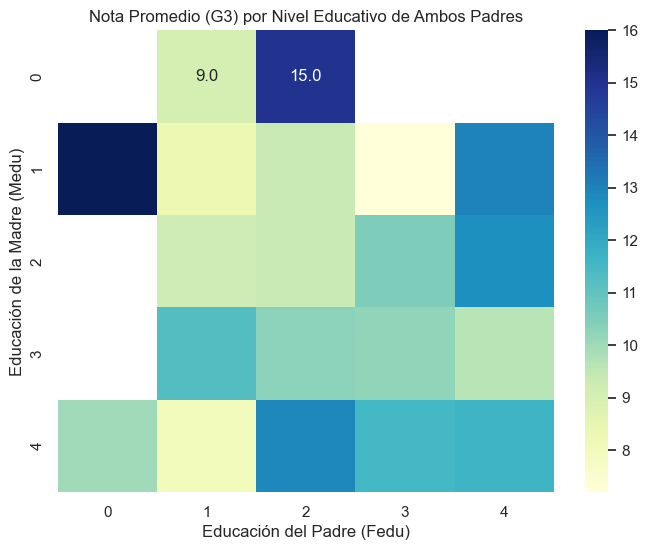

In [25]:
# Agrupar por dos variables categóricas y calcular G3 promedio
pivot_table = df_mat.pivot_table(values='G3', index='Medu', columns='Fedu', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Nota Promedio (G3) por Nivel Educativo de Ambos Padres")
plt.xlabel("Educación del Padre (Fedu)")
plt.ylabel("Educación de la Madre (Medu)")
plt.show()

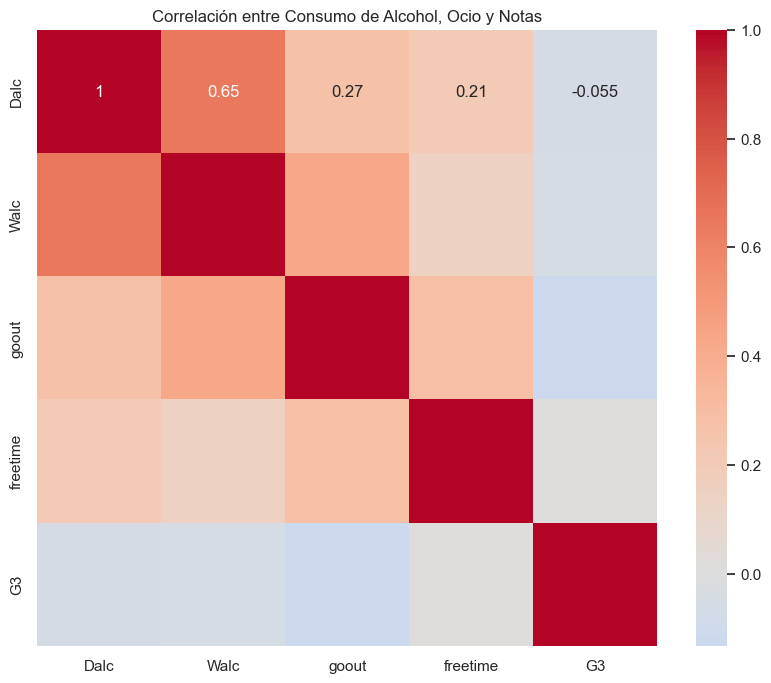

In [26]:
alcohol_vars = ['Dalc', 'Walc', 'goout', 'freetime']

plt.figure(figsize=(10, 8))
sns.heatmap(df_mat[alcohol_vars + ['G3']].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlación entre Consumo de Alcohol, Ocio y Notas")
plt.show()

## Gráficos para portugués

### Gráficos de distribución

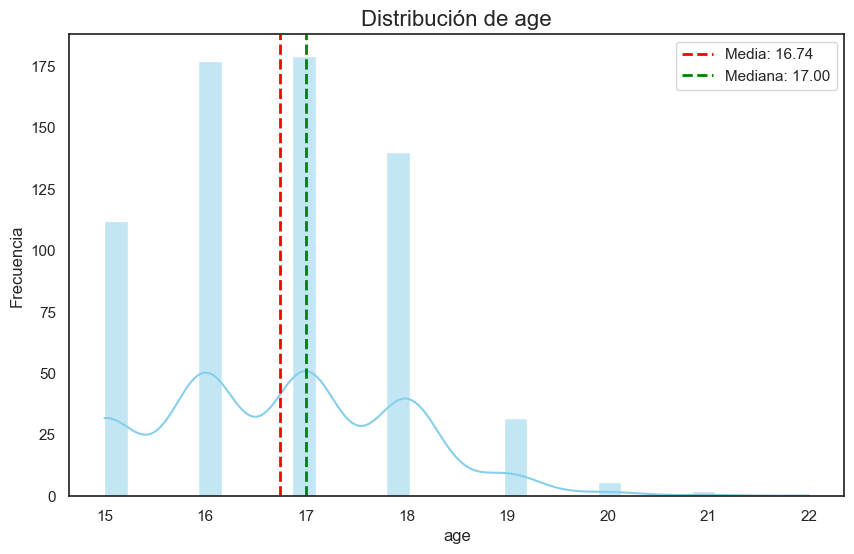

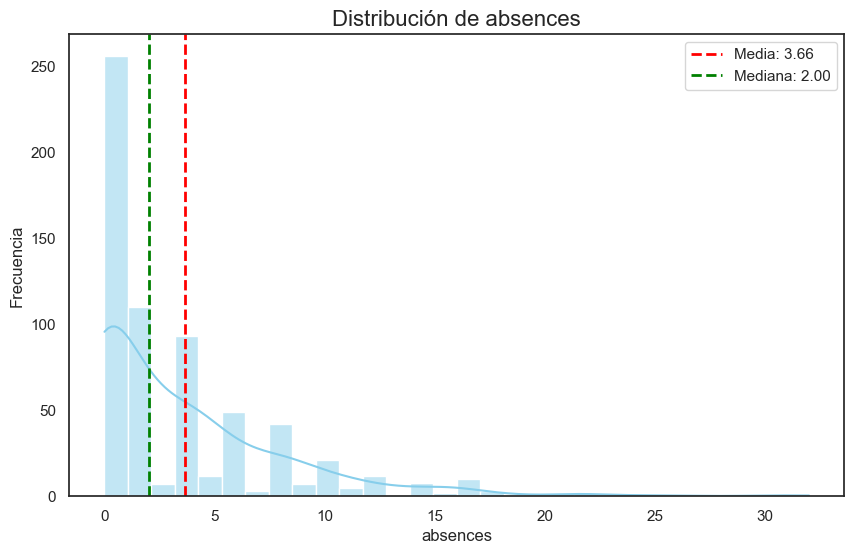

In [27]:
# Ejemplo de uso (para cada variable)
for variable in variables_cuantitativas:
    grafico_distribucion(variable, df_por)

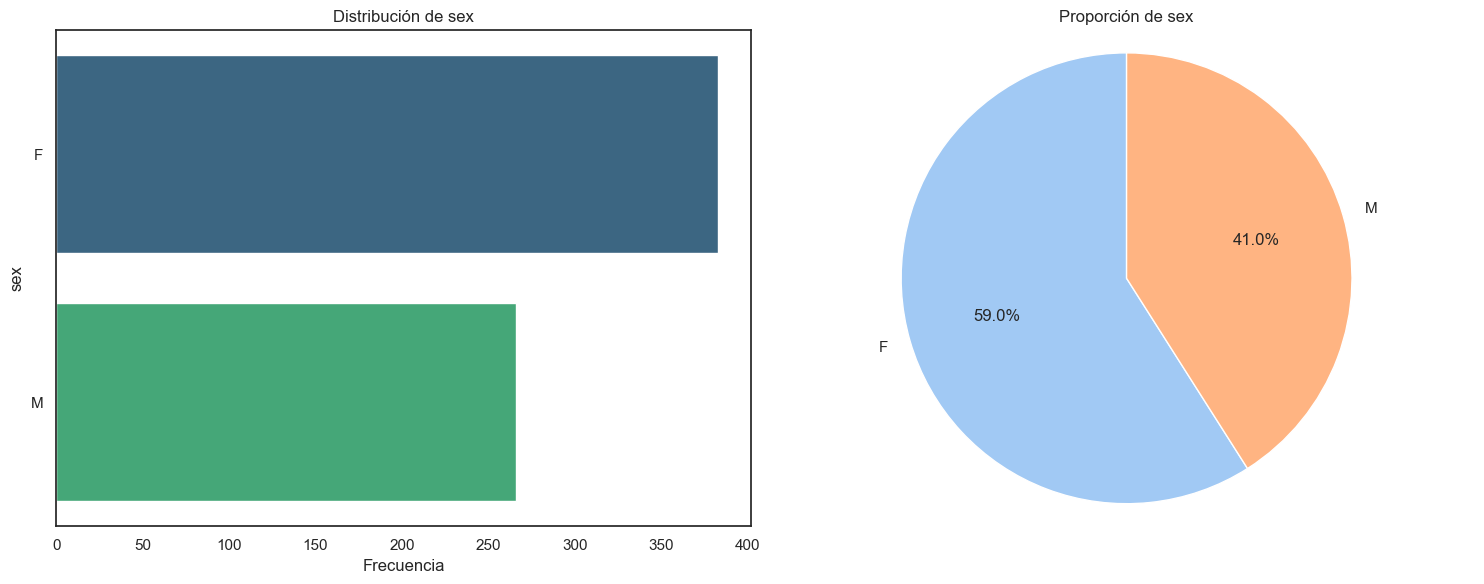

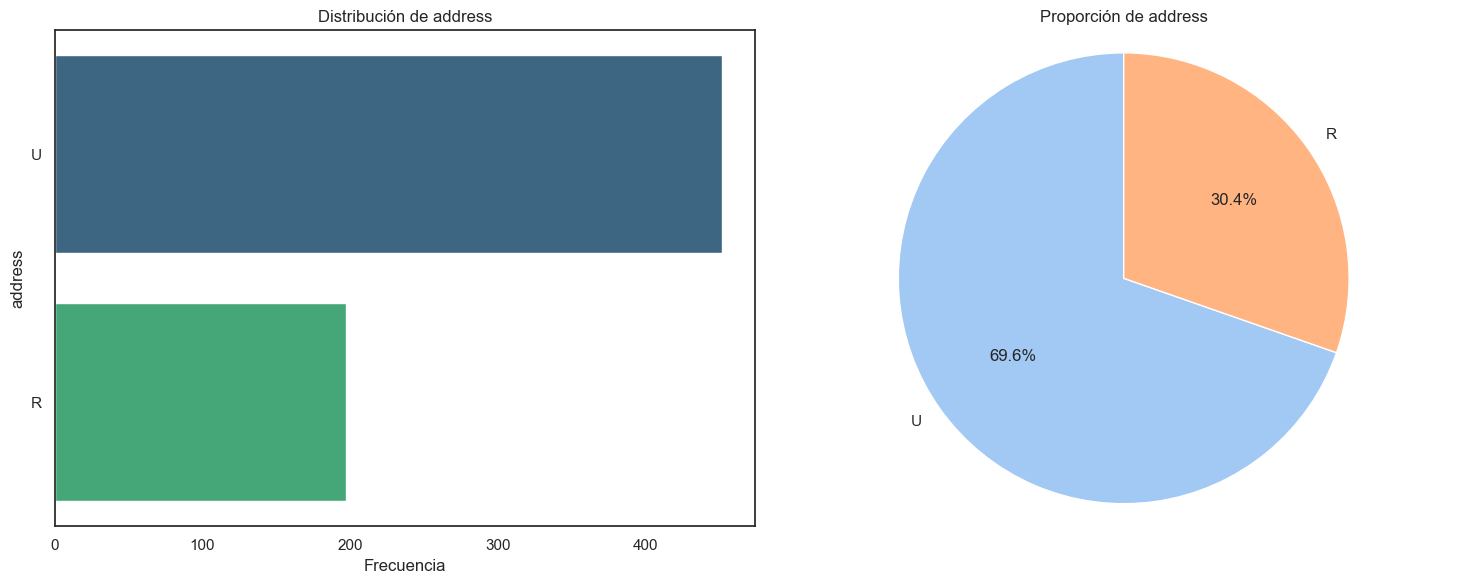

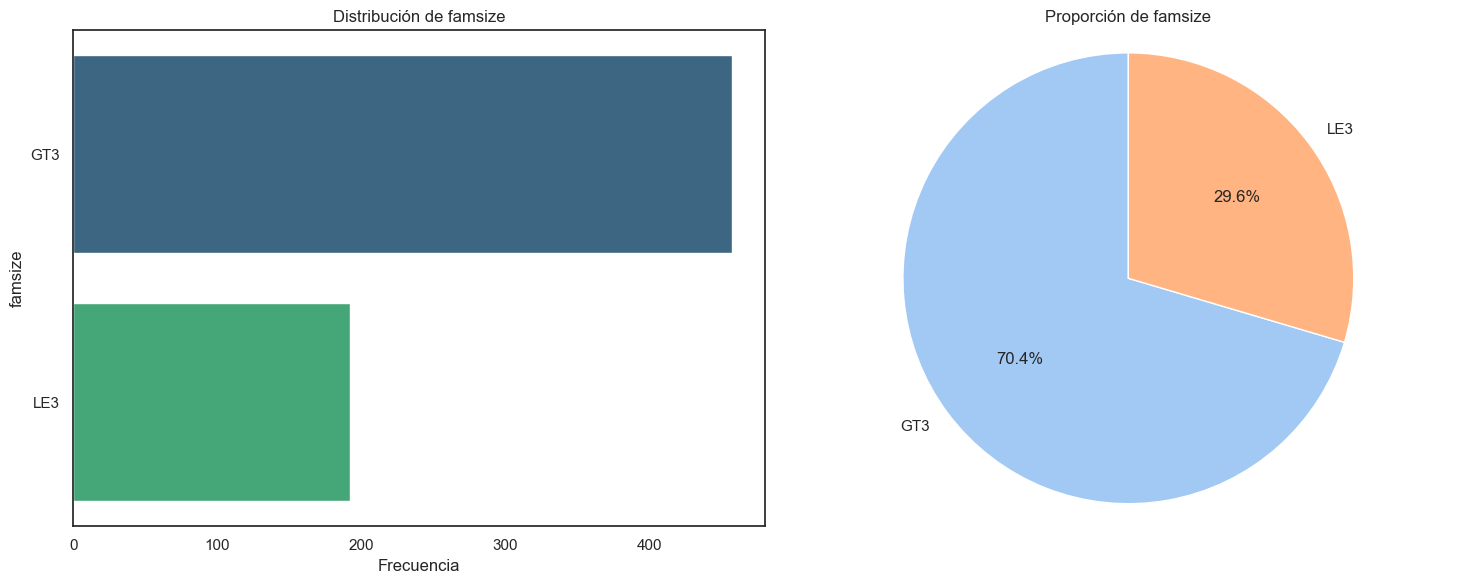

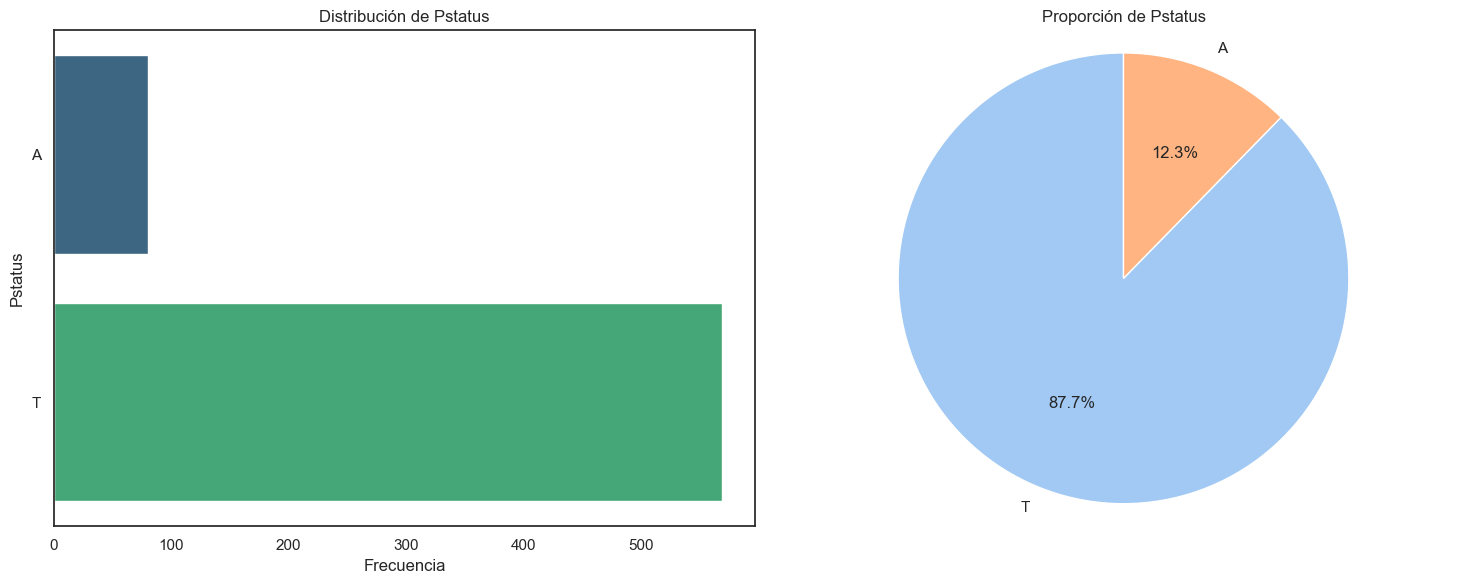

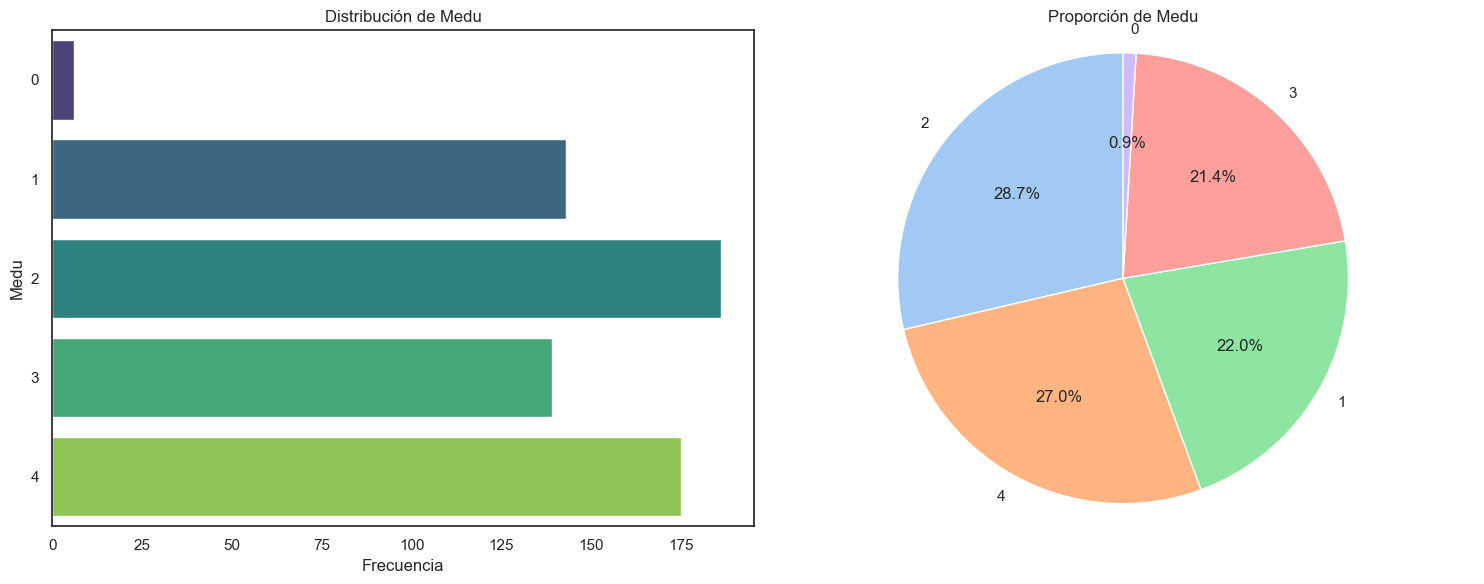

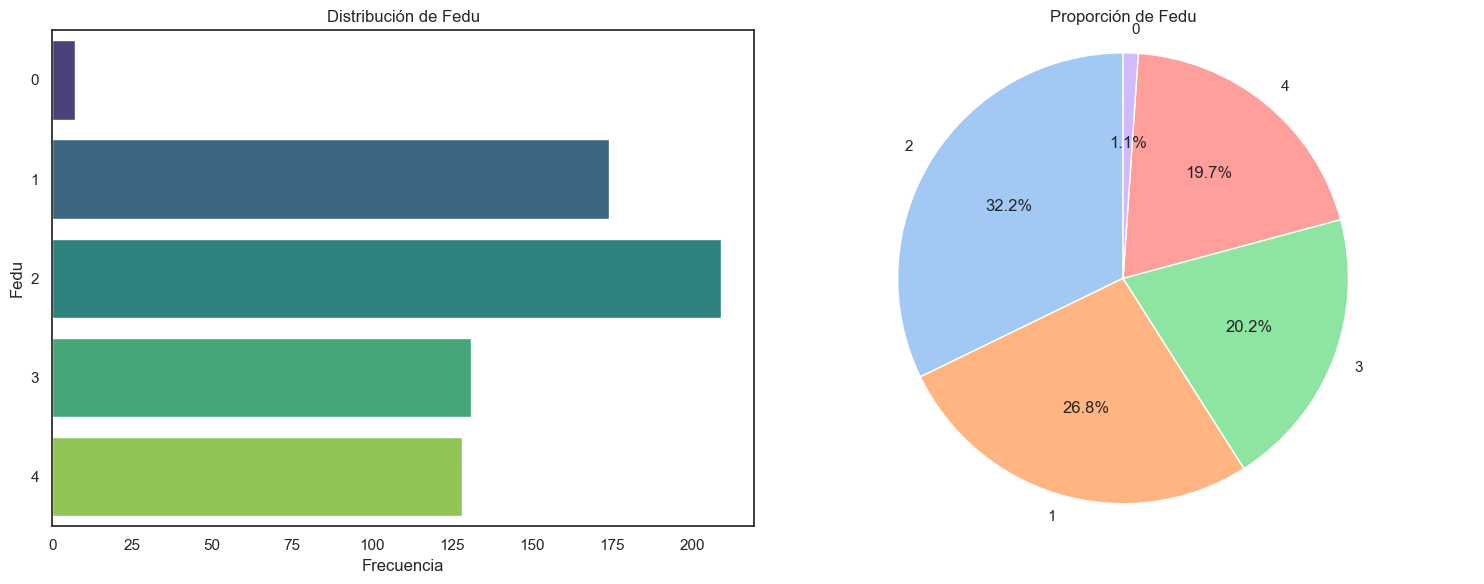

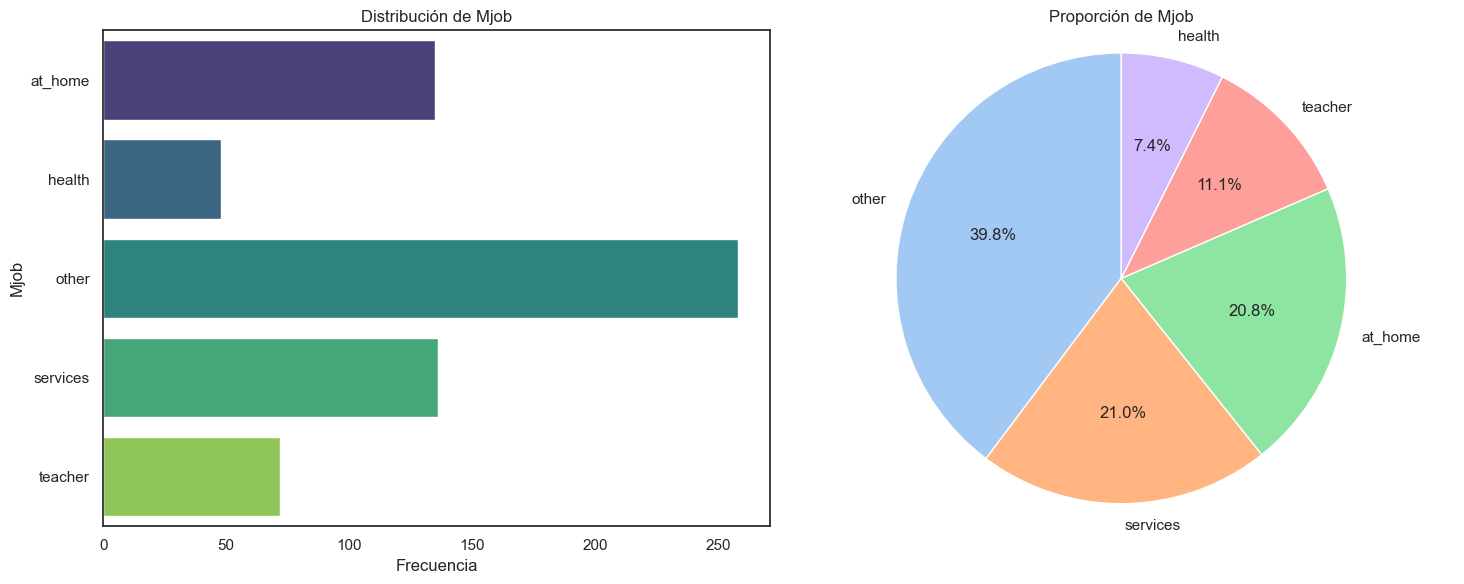

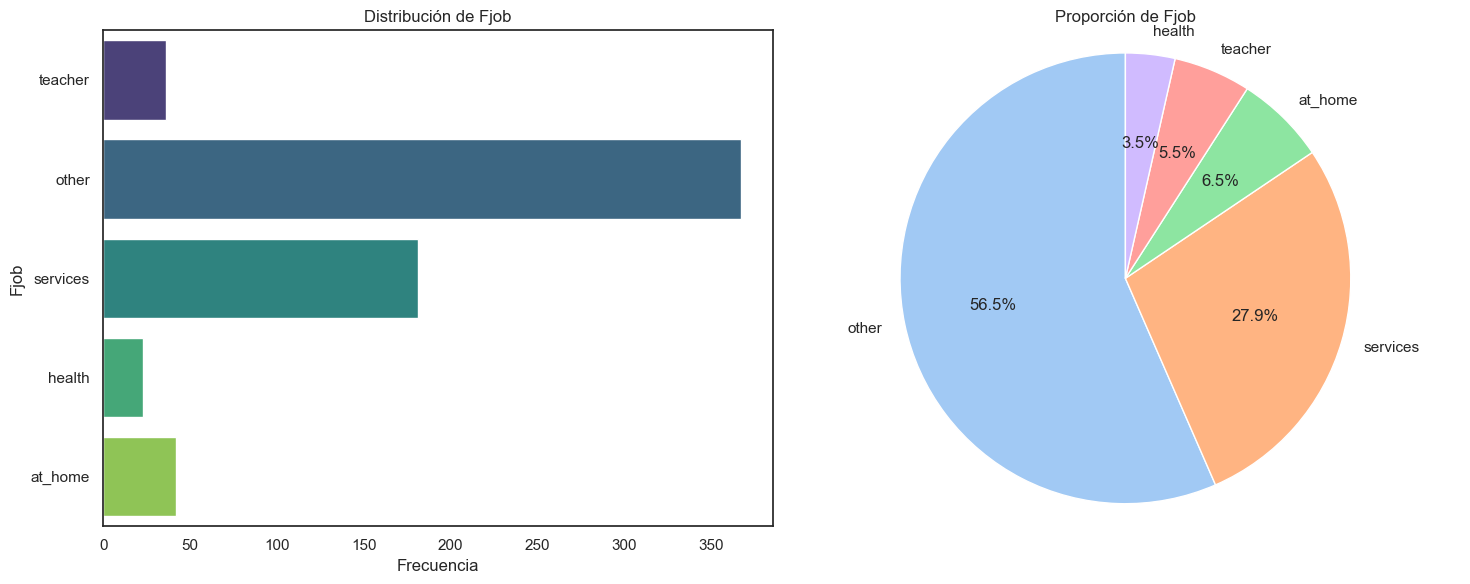

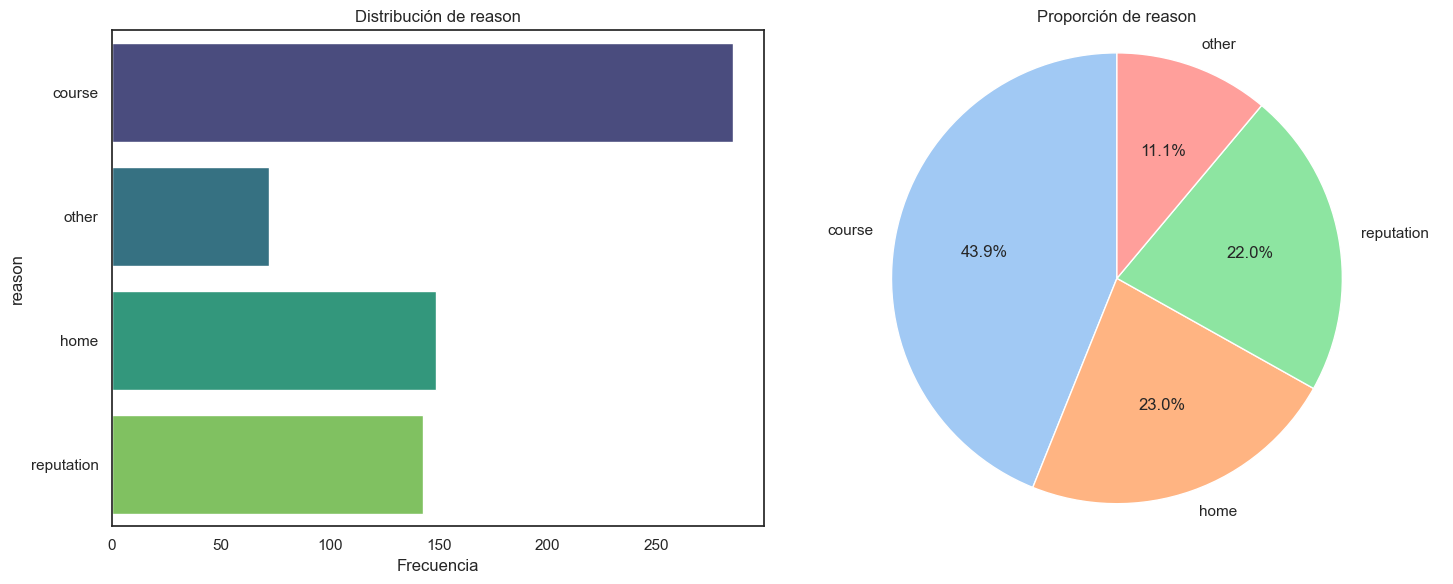

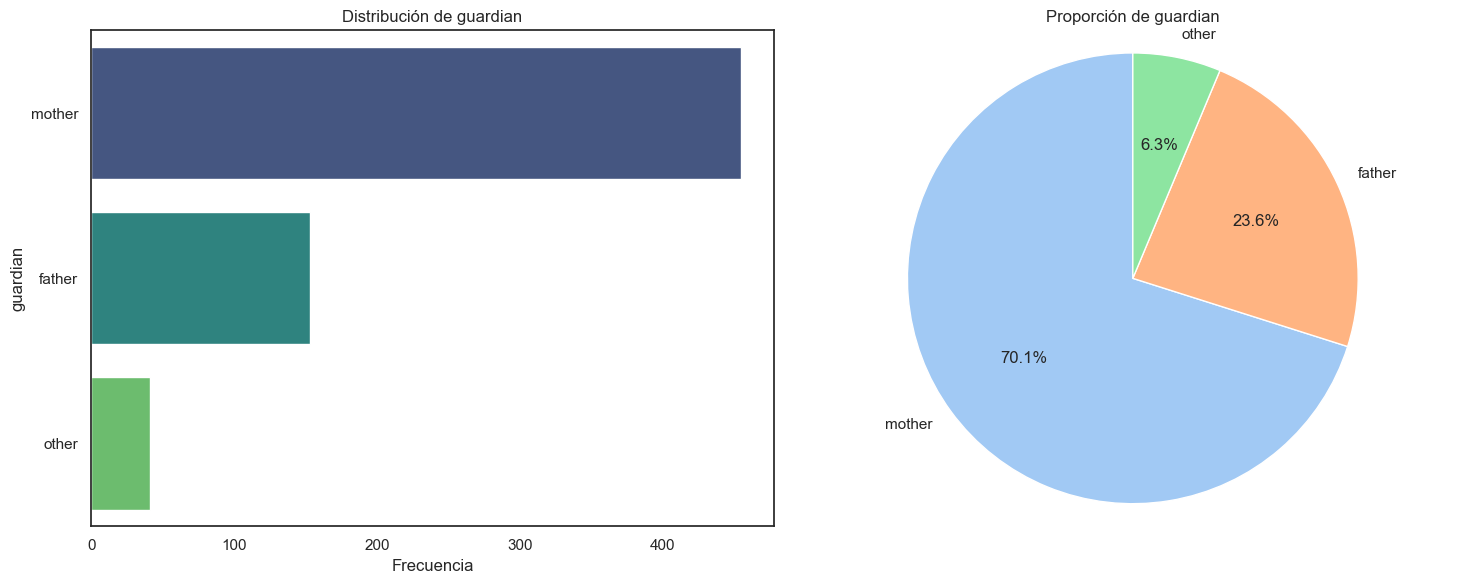

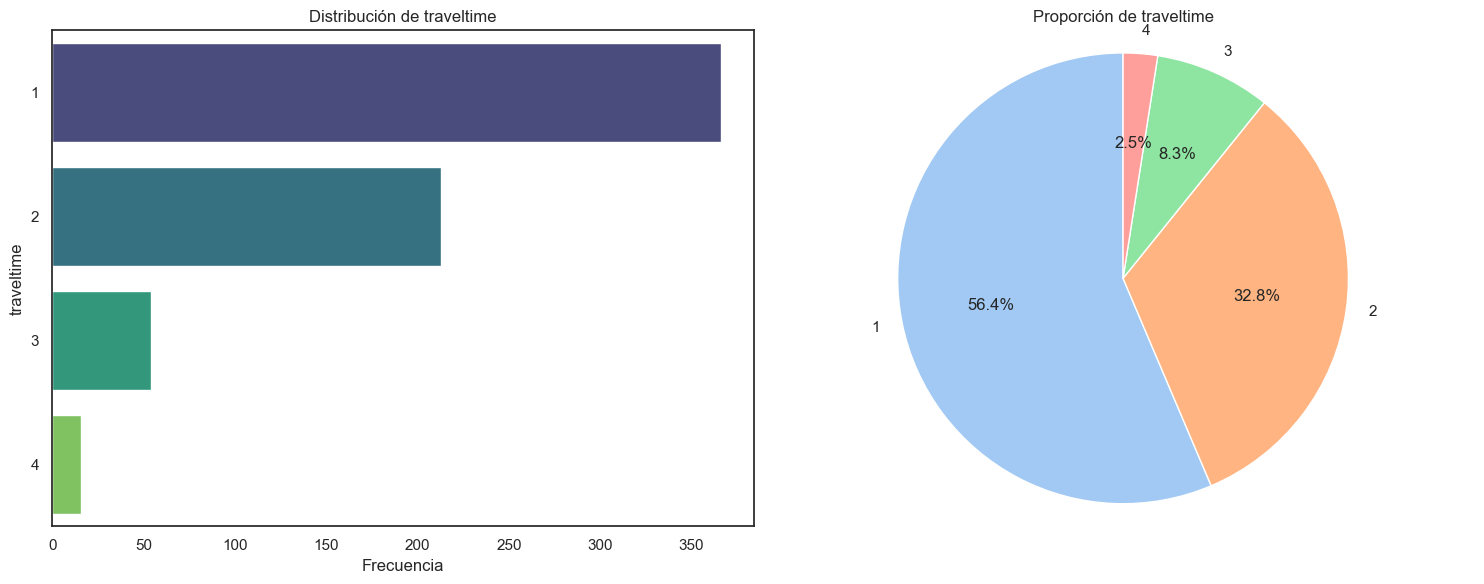

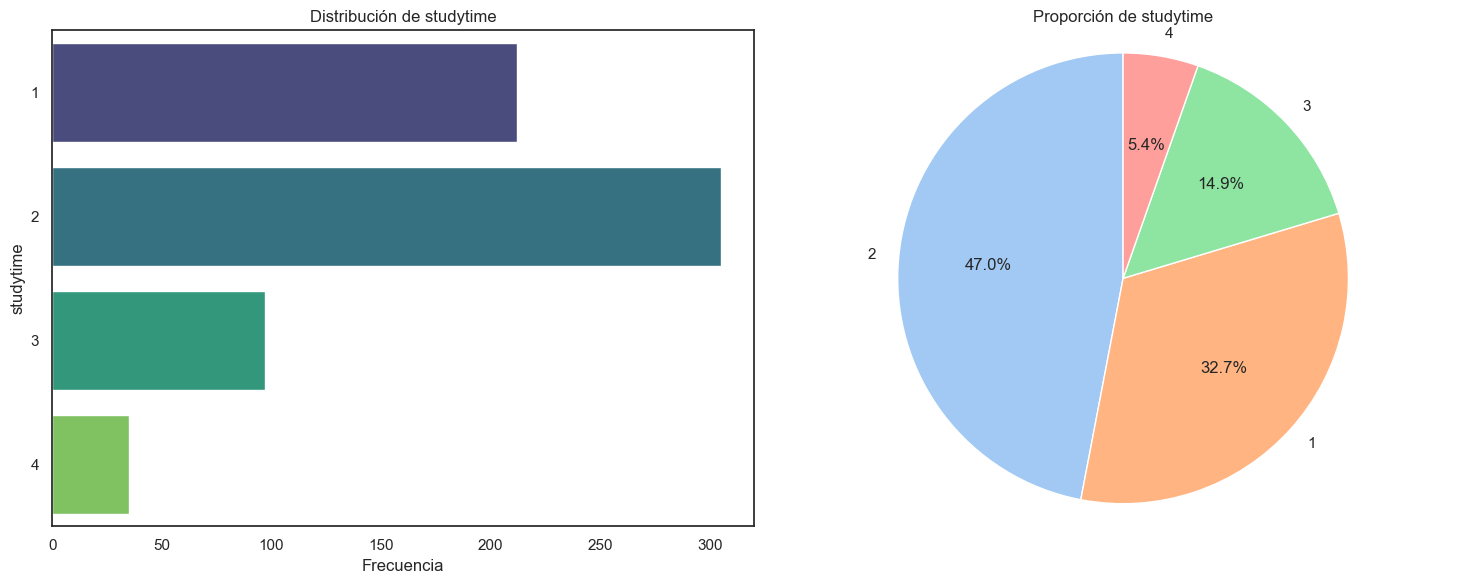

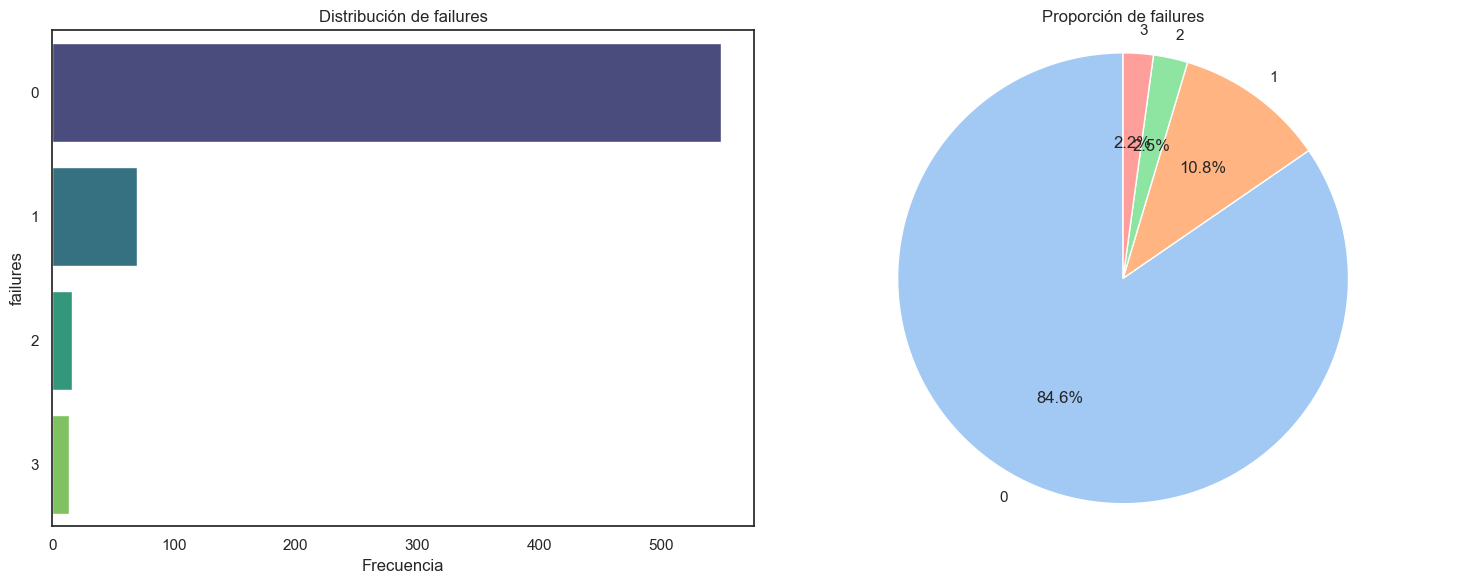

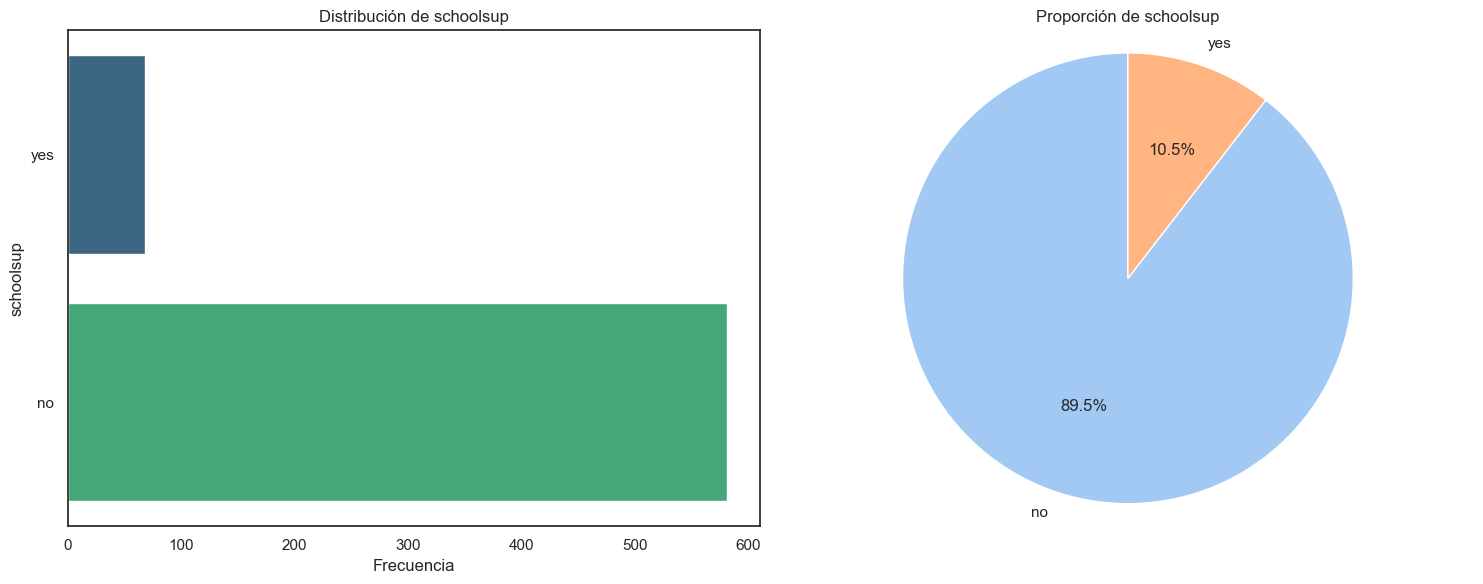

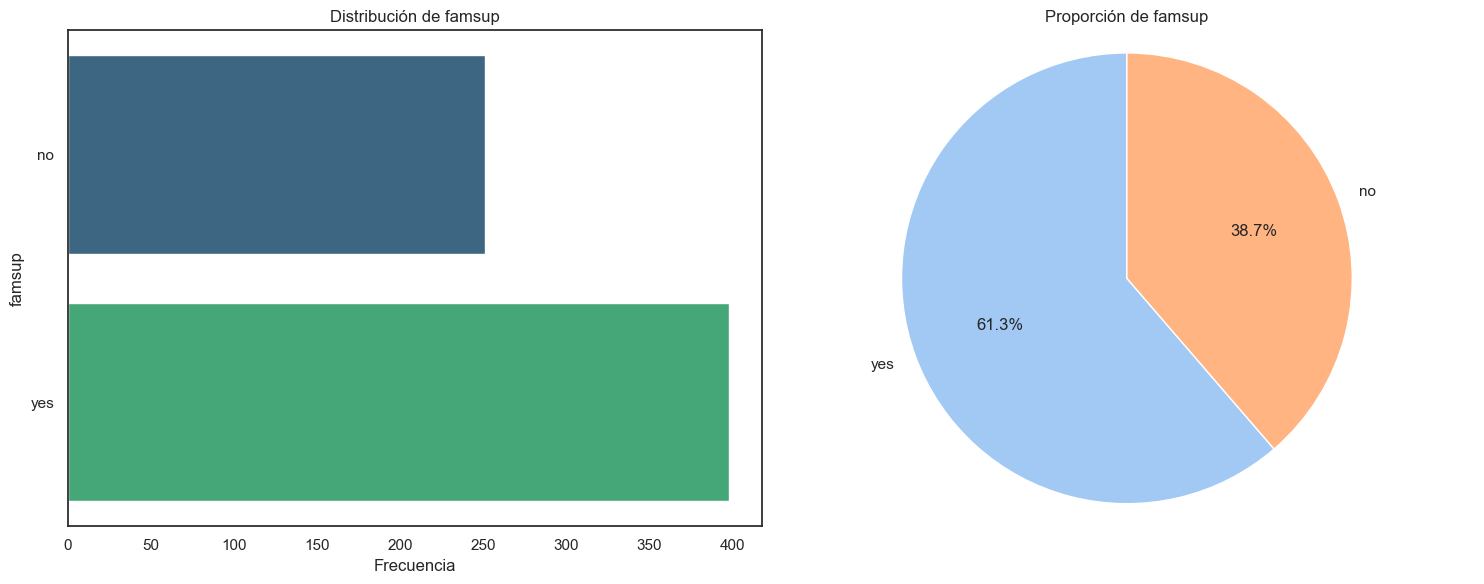

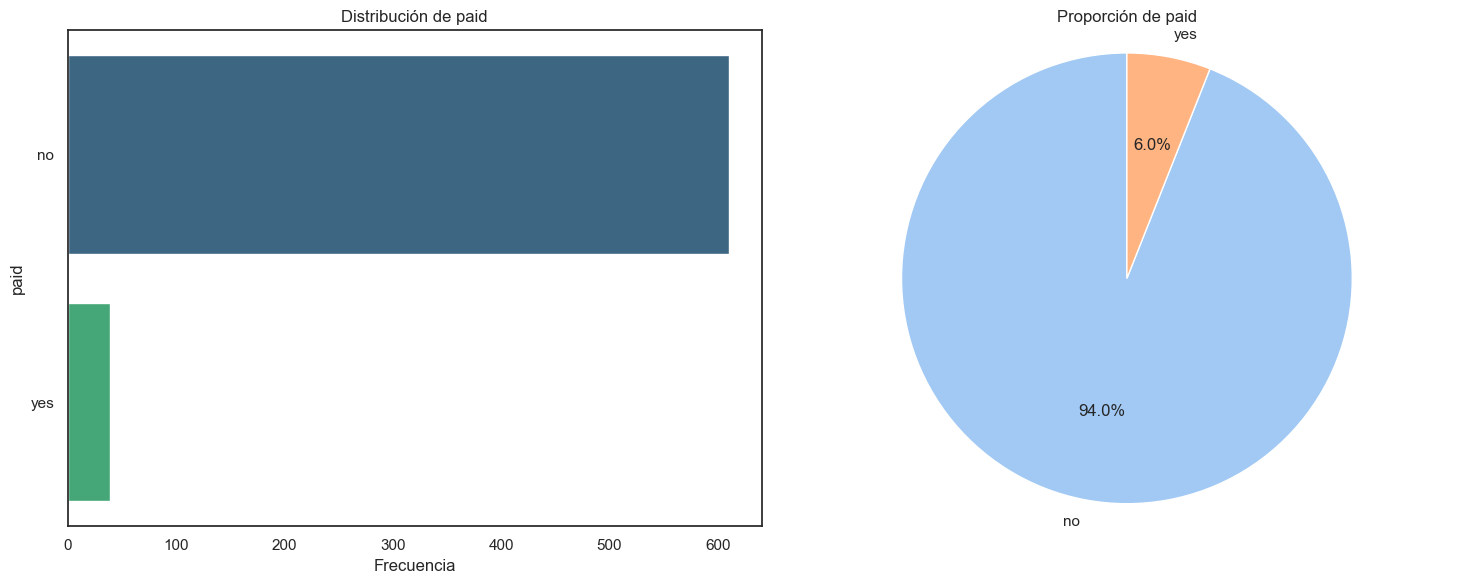

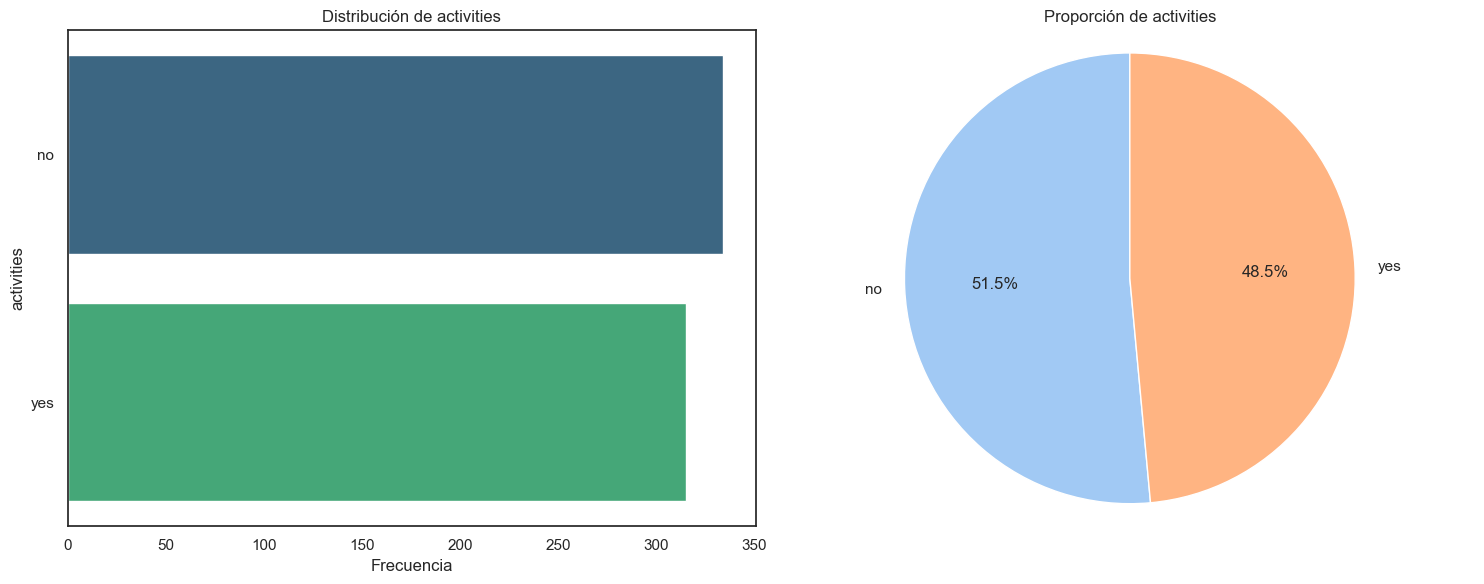

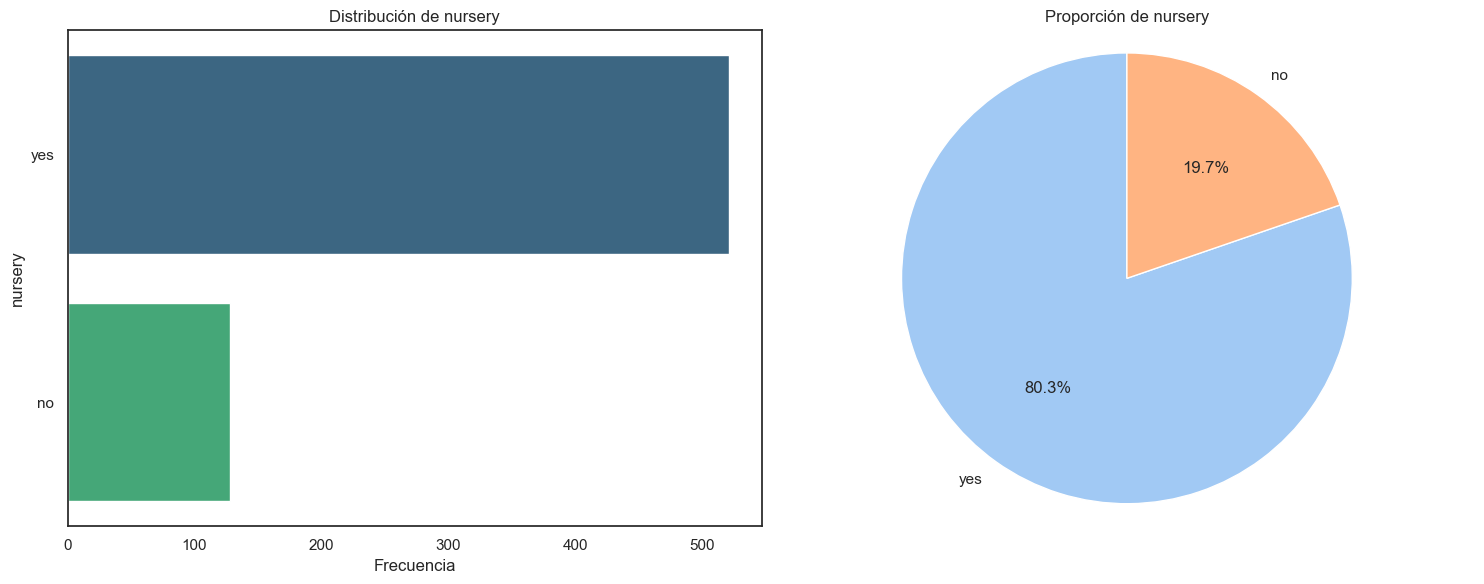

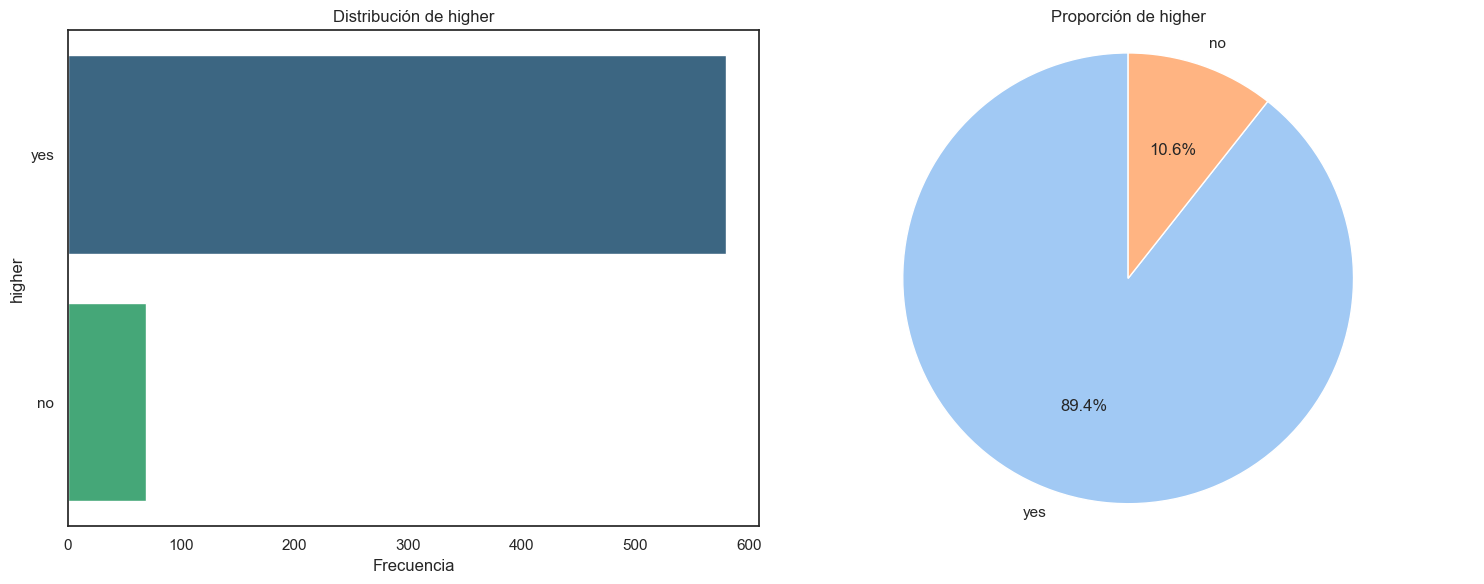

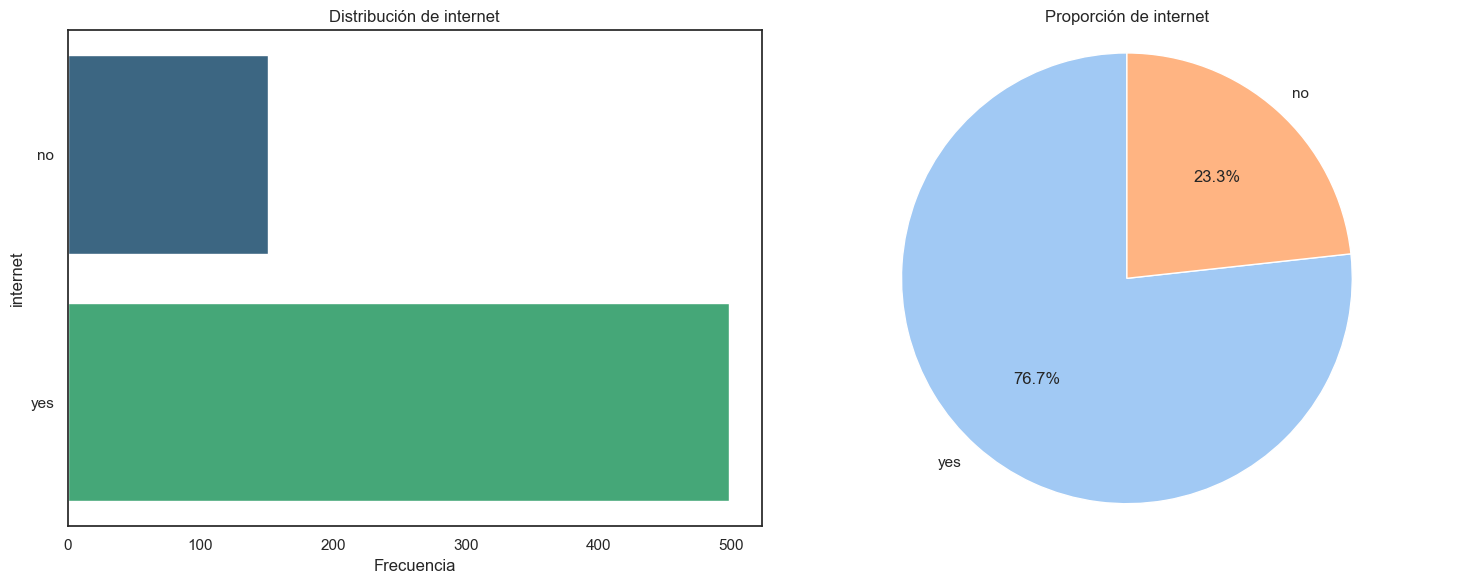

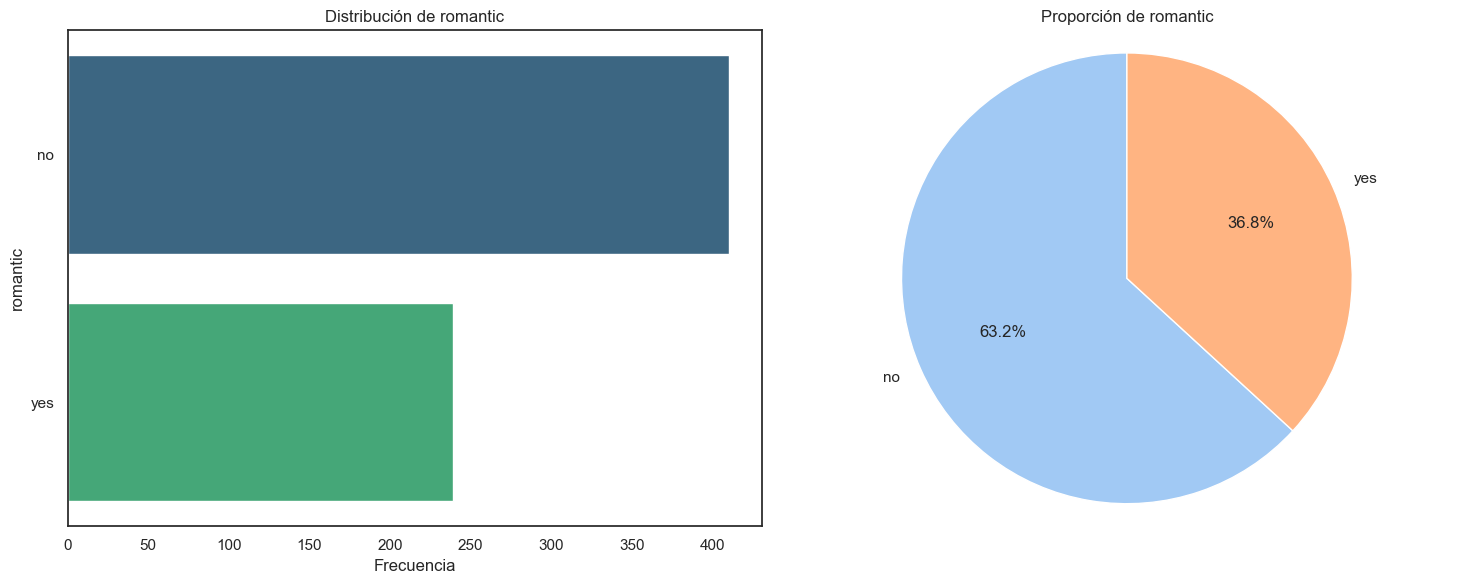

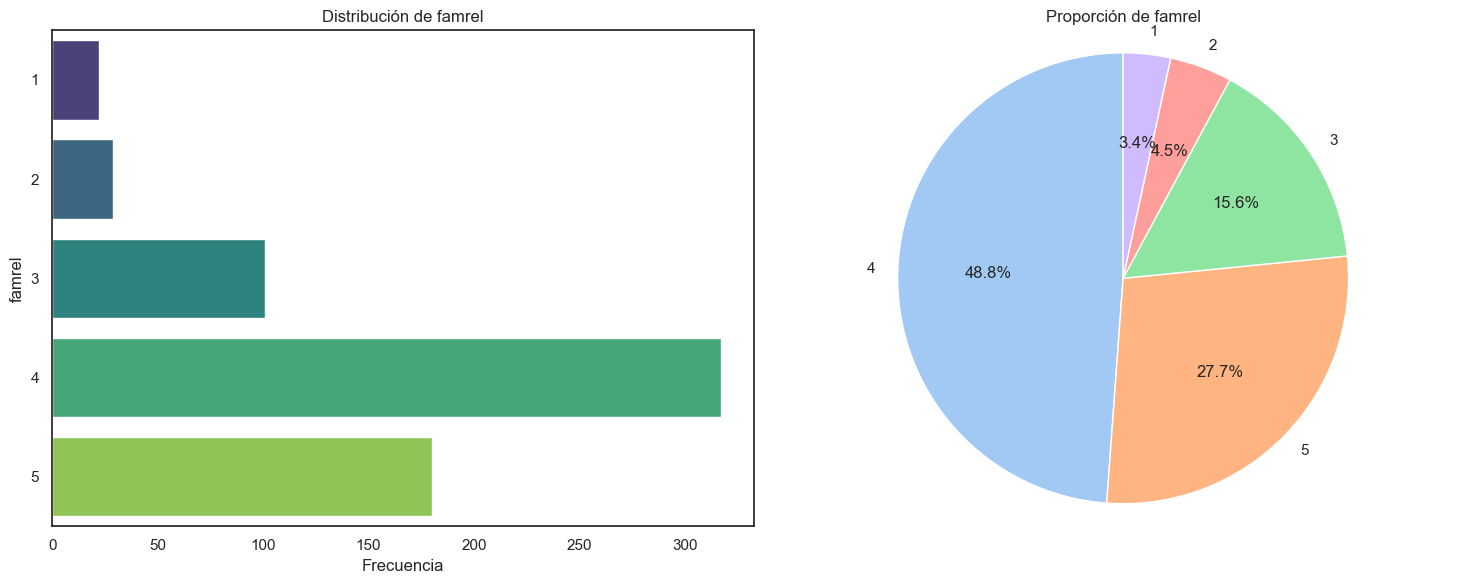

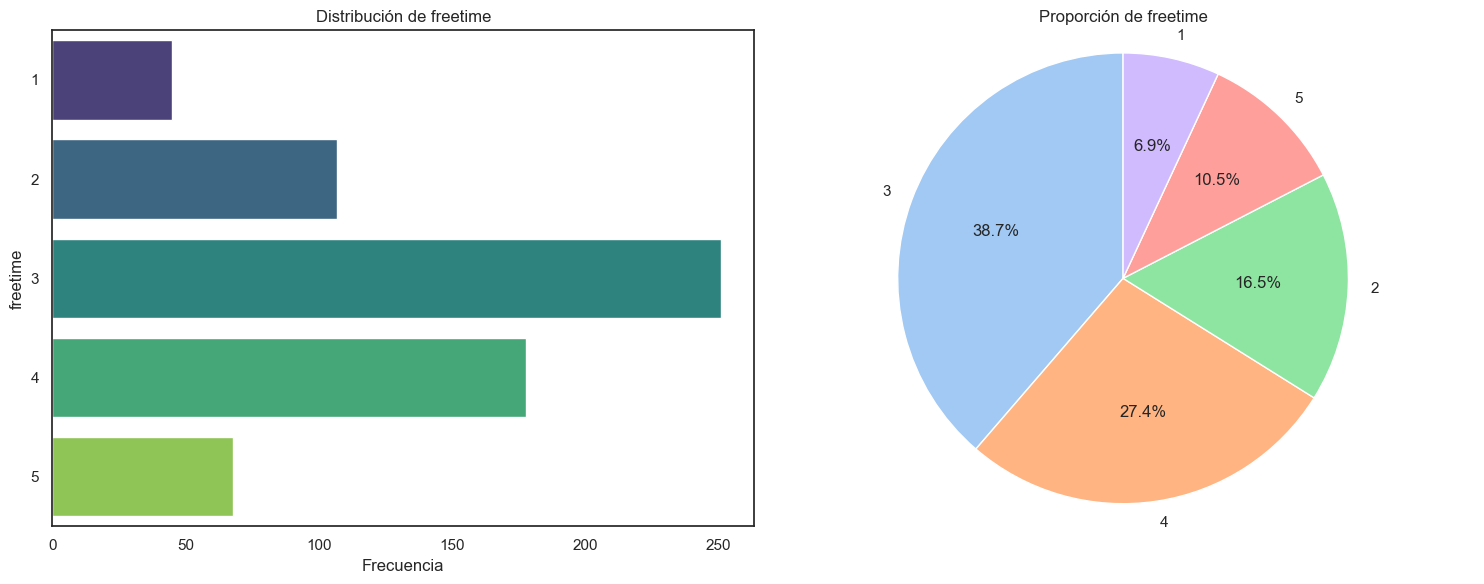

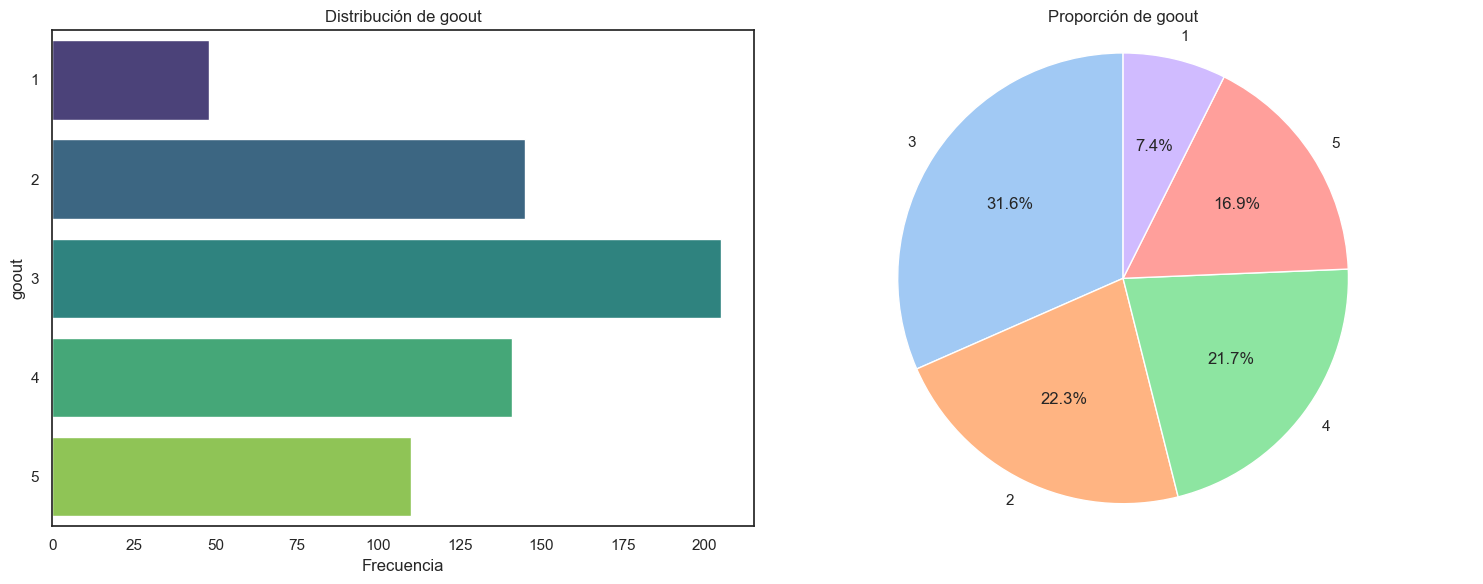

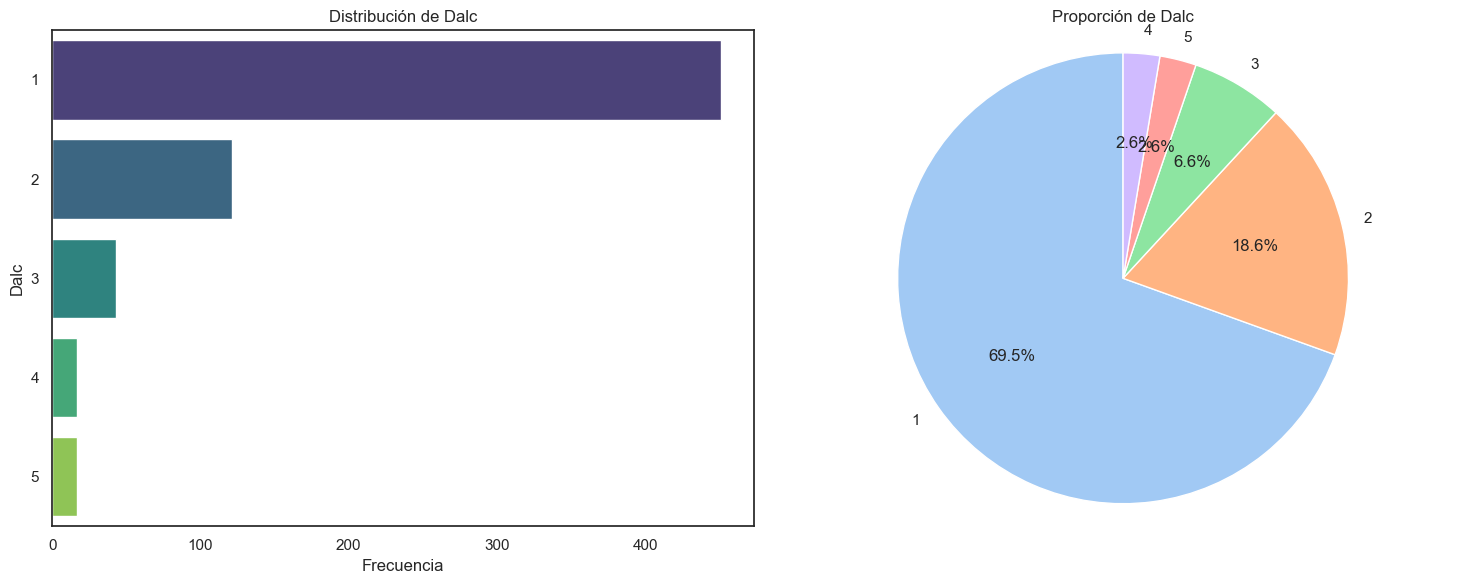

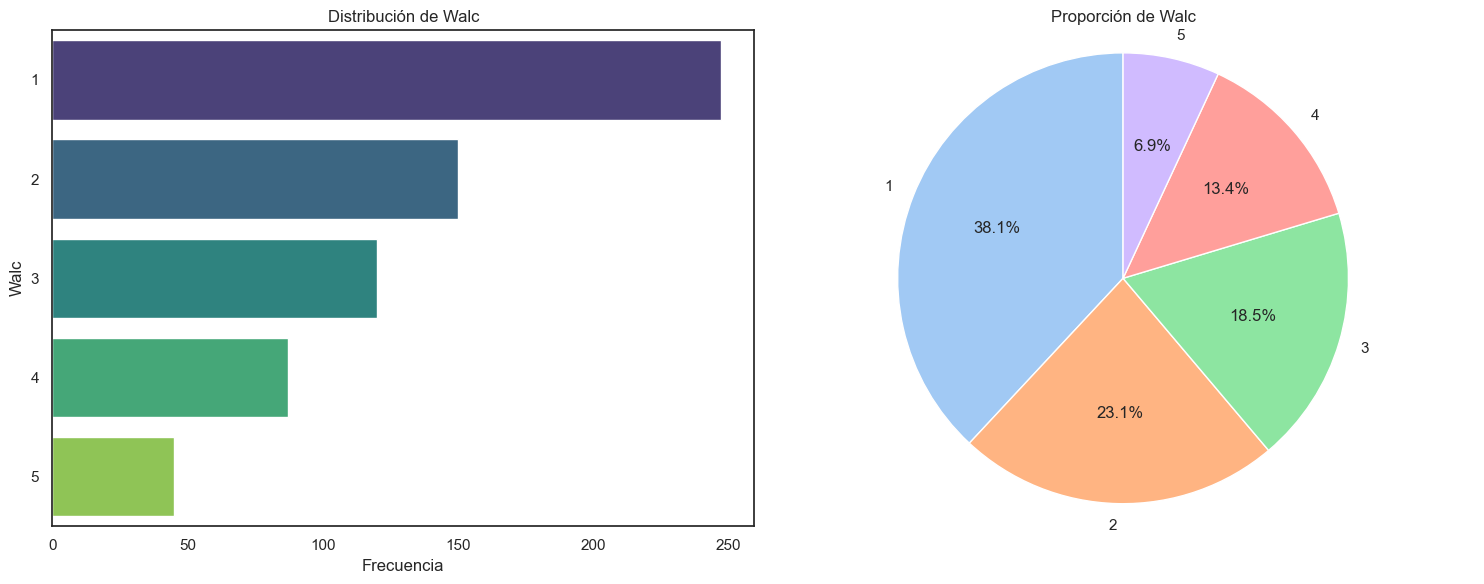

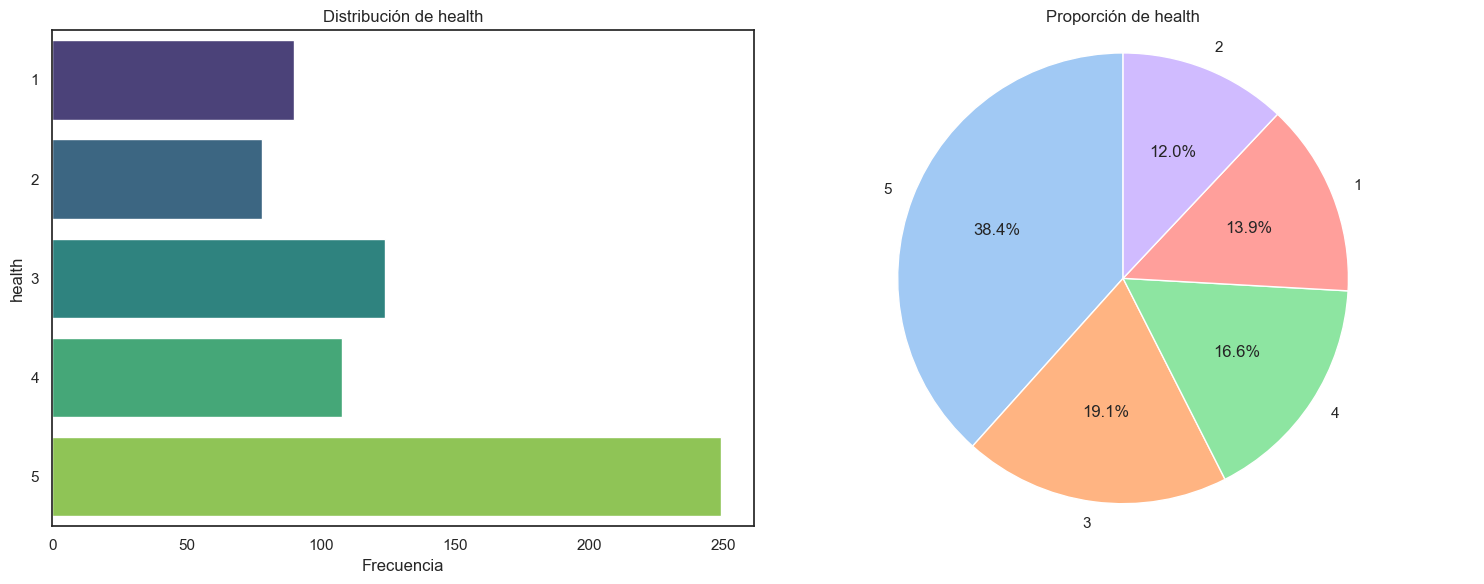

In [28]:
# Ejemplo de uso para cada variable categórica
for variable in variables_categoricas:
    grafico_categorico(variable, df_por)

### Gráficos de relación

<Figure size 1000x600 with 0 Axes>

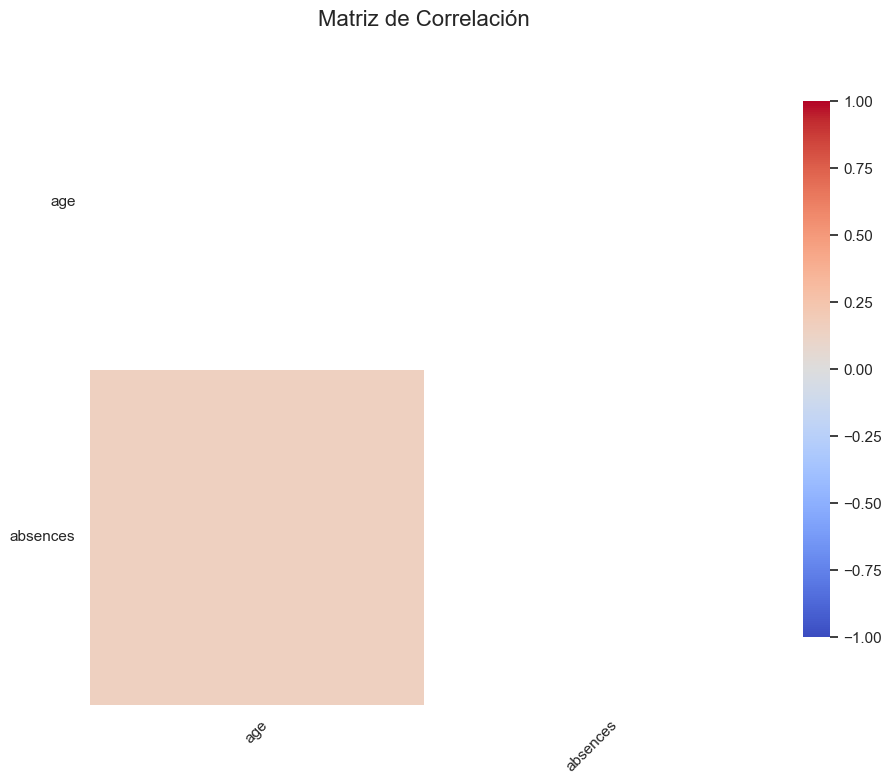

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuración
sns.set(style="white")
plt.figure(figsize=(10, 6))

# --- 1. MATRIZ DE CORRELACIÓN (Para variables cuantitativas) ---
def matriz_correlacion(df, variables_cuantitativas):
    # Calcular matriz de correlación
    corr_matrix = df[variables_cuantitativas].corr(method='pearson')  # También puede ser 'spearman' o 'kendall'
    
    # Máscara para el triángulo superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                fmt=".2f", 
                cmap="coolwarm",
                vmin=-1, 
                vmax=1,
                center=0,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .8})
    
    plt.title("Matriz de Correlación", fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

matriz_correlacion(df_por, variables_cuantitativas)

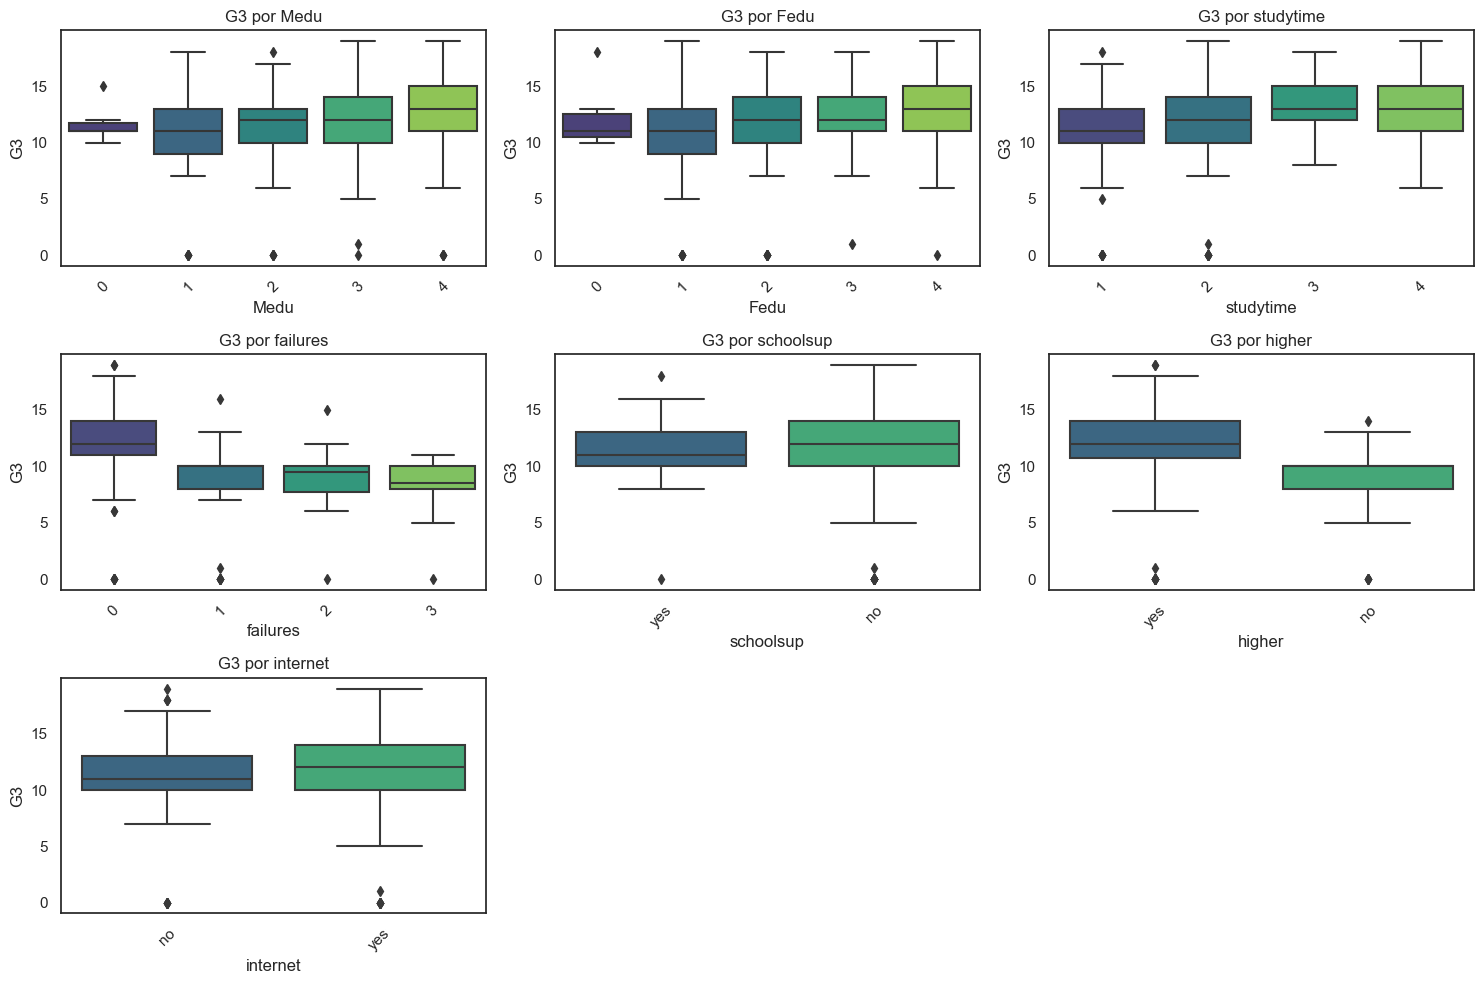

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables clave vs G3 (nota final)
variables_interes = ['Medu', 'Fedu', 'studytime', 'failures', 'schoolsup', 'higher', 'internet']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_interes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_por, x=var, y='G3', palette='viridis')
    plt.title(f'G3 por {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

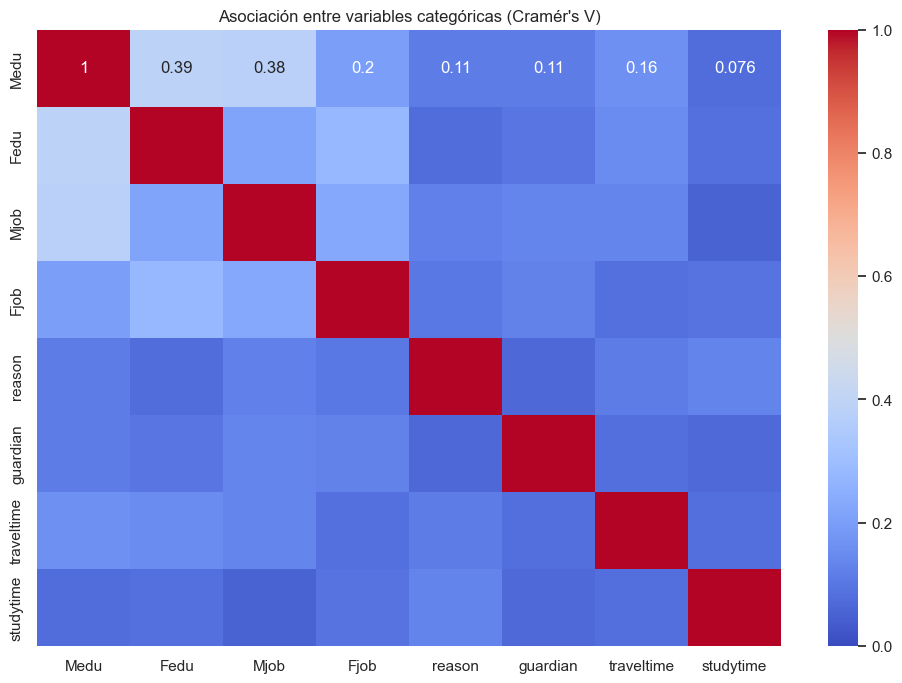

In [31]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))

# Seleccionar categóricas (excluyendo binarias para simplificar)
categoricas = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime']

# Matriz de Cramér's V
corr_matrix = pd.DataFrame(index=categoricas, columns=categoricas)
for col1 in categoricas:
    for col2 in categoricas:
        corr_matrix.loc[col1, col2] = cramers_v(df_por[col1], df_por[col2])

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Asociación entre variables categóricas (Cramér's V)")
plt.show()

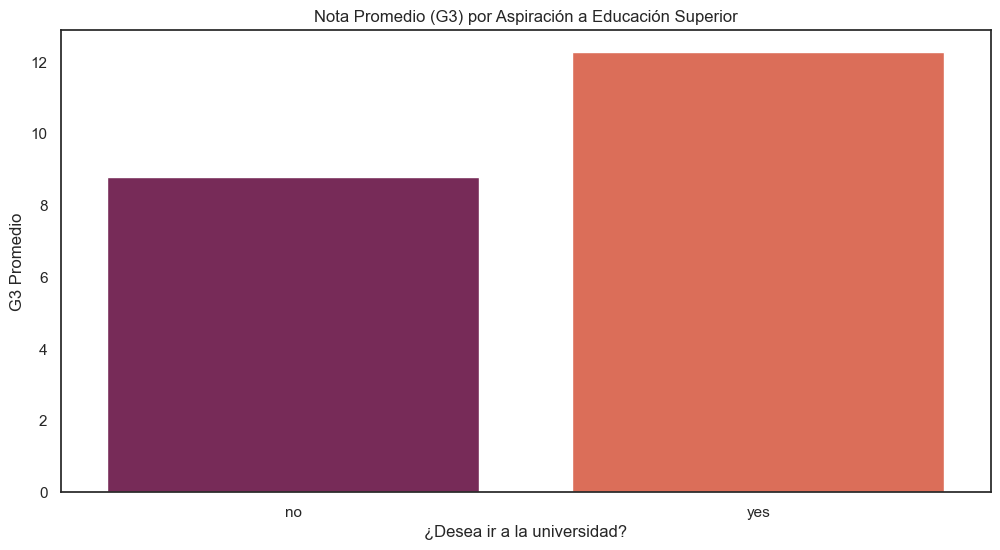

In [32]:
binarias = ['schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic']

plt.figure(figsize=(12, 6))
df_grouped = df_por.groupby('higher')['G3'].mean().reset_index()
sns.barplot(data=df_grouped, x='higher', y='G3', palette='rocket')
plt.title("Nota Promedio (G3) por Aspiración a Educación Superior")
plt.ylabel("G3 Promedio")
plt.xlabel("¿Desea ir a la universidad?")
plt.show()

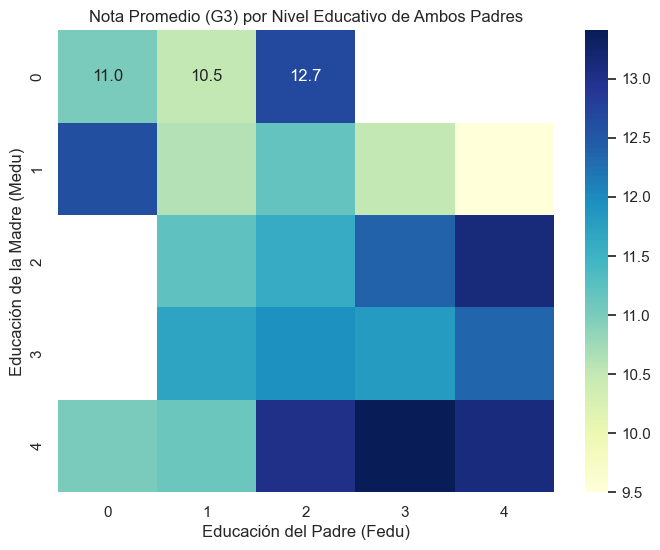

In [33]:
# Agrupar por dos variables categóricas y calcular G3 promedio
pivot_table = df_por.pivot_table(values='G3', index='Medu', columns='Fedu', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Nota Promedio (G3) por Nivel Educativo de Ambos Padres")
plt.xlabel("Educación del Padre (Fedu)")
plt.ylabel("Educación de la Madre (Medu)")
plt.show()

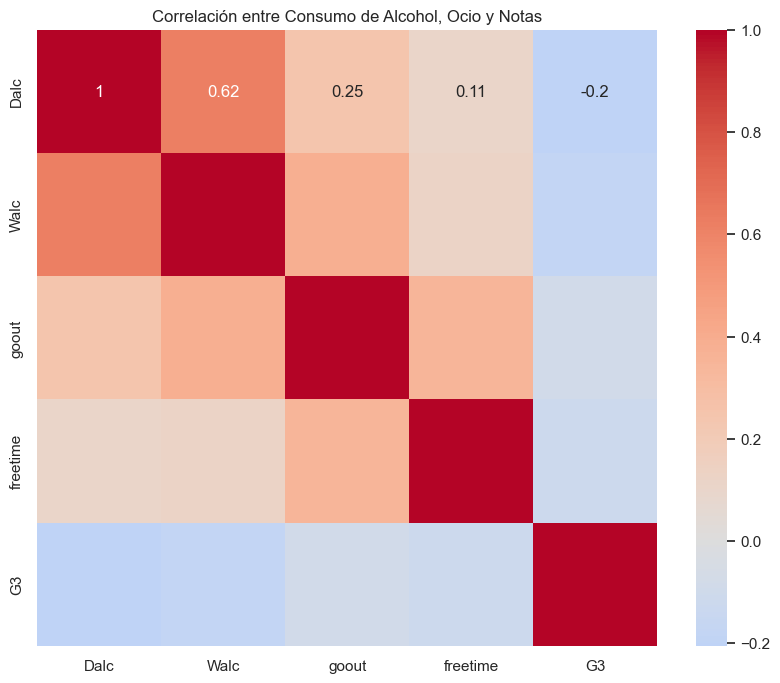

In [34]:
alcohol_vars = ['Dalc', 'Walc', 'goout', 'freetime']

plt.figure(figsize=(10, 8))
sns.heatmap(df_por[alcohol_vars + ['G3']].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlación entre Consumo de Alcohol, Ocio y Notas")
plt.show()

# Ajuste de los modelos

## Regresión Multilineal

In [ ]:


from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

# ————————————————————————————————————————————————
# 1. Prepara X, y y detecta columnas
# ————————————————————————————————————————————————
y = df_por['G3']
X = df_por.drop(columns=['G1', 'G2', 'G3'])

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ————————————————————————————————————————————————
# 2. Crea el preprocesador
# ————————————————————————————————————————————————
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
    ('passthru', 'passthrough', num_cols)
])

# ————————————————————————————————————————————————
# 3. Validación cruzada con OLS simple
# ————————————————————————————————————————————————
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ols_pipe = make_pipeline(preprocessor, LinearRegression())

cv_scores = cross_val_score(
    ols_pipe, X, y,
    cv=kf,
    scoring='r2'
)

print("R² CV (OLS):", cv_scores)
print("R² CV media:", cv_scores.mean())

# ————————————————————————————————————————————————
# 4. Ajuste final del modelo (puedes cambiar por RidgeCV/LassoCV)
# ————————————————————————————————————————————————
# Aquí usamos Ridge con búsqueda interna de α vía CV
ridge_pipe = make_pipeline(
    preprocessor,
    RidgeCV(alphas=[0.1, 1.0, 10.0], cv=kf)
)
ridge_pipe.fit(X, y)

best_alpha = ridge_pipe.named_steps['ridgecv'].alpha_
print(f"Mejor α (RidgeCV): {best_alpha:.3f}")
print("R² en todo el set (Ridge):", ridge_pipe.score(X, y))

# Si prefieres Lasso:
lasso_pipe = make_pipeline(
    preprocessor,
    LassoCV(alphas=[0.01, 0.1, 1.0], cv=kf, max_iter=5000)
)
lasso_pipe.fit(X, y)
best_alpha_l = lasso_pipe.named_steps['lassocv'].alpha_
print(f"Mejor α (LassoCV): {best_alpha_l:.3f}")
print("R² en todo el set (Lasso):", lasso_pipe.score(X, y))



R² CV (OLS): [0.16016992 0.3609556  0.26625703 0.3085361  0.13588923]
R² CV media: 0.24636157744742743
Mejor α (RidgeCV): 10.000
R² en todo el set (Ridge): 0.3583819714985821
Mejor α (LassoCV): 0.010
R² en todo el set (Lasso): 0.3577478460178505


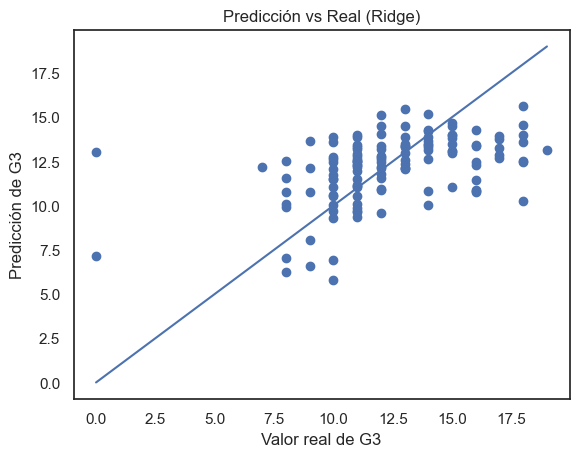

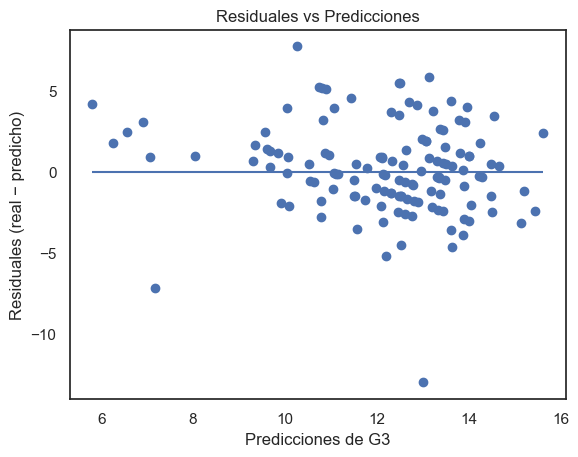

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1) Asume que tienes ya tu DataFrame `df`, tu preprocesador `preprocessor`
#    y tu modelo regularizado, por ejemplo `ridge_pipe`.

# Separa datos en entrenamiento y prueba
# Correcto: 4 variables para 4 outputs
X_train, X_test, y_train, y_test = train_test_split(
    X,      # tu matriz de predictores
    y,      # tu vector objetivo
    test_size=0.2,
    random_state=42
)

# Ajusta el pipeline (preprocesador + Ridge) en el training set
ridge_pipe.fit(X_train, y_train)

# Predice sobre el testing set
y_pred = ridge_pipe.predict(X_test)

# 2) Grafica predicción vs valor real
plt.figure()
plt.scatter(y_test, y_pred)                    # puntos reales vs predichos
minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())
plt.plot([minv, maxv], [minv, maxv])           # línea 45° ideal: pred=real
plt.xlabel("Valor real de G3")
plt.ylabel("Predicción de G3")
plt.title("Predicción vs Real (Ridge)")
plt.show()

# 3) (Opcional) Gráfico de residuos
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max())
plt.xlabel("Predicciones de G3")
plt.ylabel("Residuales (real − predicho)")
plt.title("Residuales vs Predicciones")
plt.show()


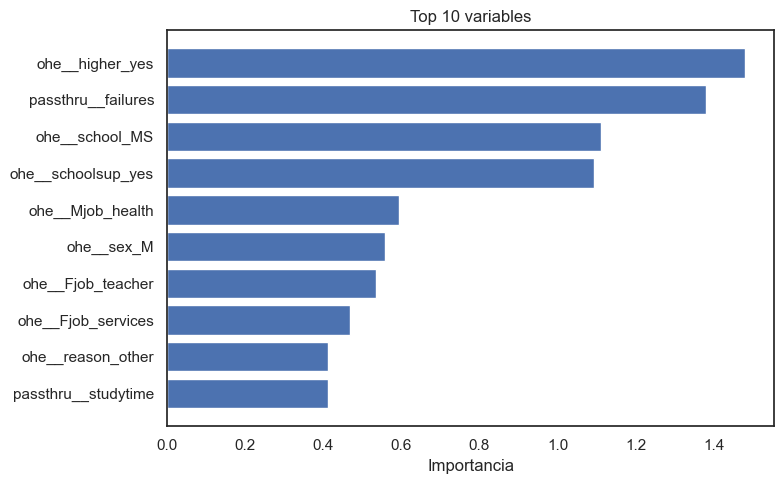

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

# ————————————————————————————————————————————————
# 1. Asegúrate de tener tu DataFrame cargado en la variable `df`
#    por ejemplo: df = pd.read_csv('tus_datos.csv')
# ————————————————————————————————————————————————

# Columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocesador
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
    ('passthru', 'passthrough', num_cols)
])

# 5-fold CV para Ridge
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_pipe = make_pipeline(
    preprocessor,
    RidgeCV(alphas=[0.1, 1.0, 10.0], cv=kf)
)

# Ajuste
ridge_pipe.fit(X, y)

# Extraer nombres de variables y coeficientes
feature_names = ridge_pipe.named_steps['columntransformer'].get_feature_names_out()
coefs = ridge_pipe.named_steps['ridgecv'].coef_.flatten()

# Importancia = valor absoluto del coeficiente
importances = np.abs(coefs)
imp_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 10 variables
top_n = 10
top_imp = imp_series.head(top_n)

# Gráfico de barras horizontales
plt.figure(figsize=(8, 5))
plt.barh(top_imp.index[::-1], top_imp.values[::-1])
plt.xlabel('Importancia')
plt.title(f'Top {top_n} variables')
plt.tight_layout()
plt.show()


In [19]:
print(top_imp)

ohe__higher_yes        1.480742
passthru__failures     1.380219
ohe__school_MS         1.110512
ohe__schoolsup_yes     1.092946
ohe__Mjob_health       0.592498
ohe__sex_M             0.559046
ohe__Fjob_teacher      0.535480
ohe__Fjob_services     0.467047
ohe__reason_other      0.412789
passthru__studytime    0.410848
dtype: float64


## XGBoost

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros encontrados:
  regressor__subsample: 0.5
  regressor__reg_lambda: 5.0
  regressor__reg_alpha: 0.1
  regressor__max_depth: 3
  regressor__learning_rate: 0.01
  regressor__gamma: 0.5
  regressor__colsample_bytree: 0.7
R² CV estimado (mejor): 0.278
R² en hold-out (20%): 0.319

Top 10 variables más importantes:
              feature  importance
       pass__failures    0.107120
   binary__higher_yes    0.072579
    binary__school_MS    0.045757
    binary__address_U    0.038509
           pass__Dalc    0.029305
      pass__studytime    0.029056
binary__schoolsup_yes    0.026108
           pass__Fedu    0.025411
nominal__reason_other    0.024589
nominal__Mjob_at_home    0.024126


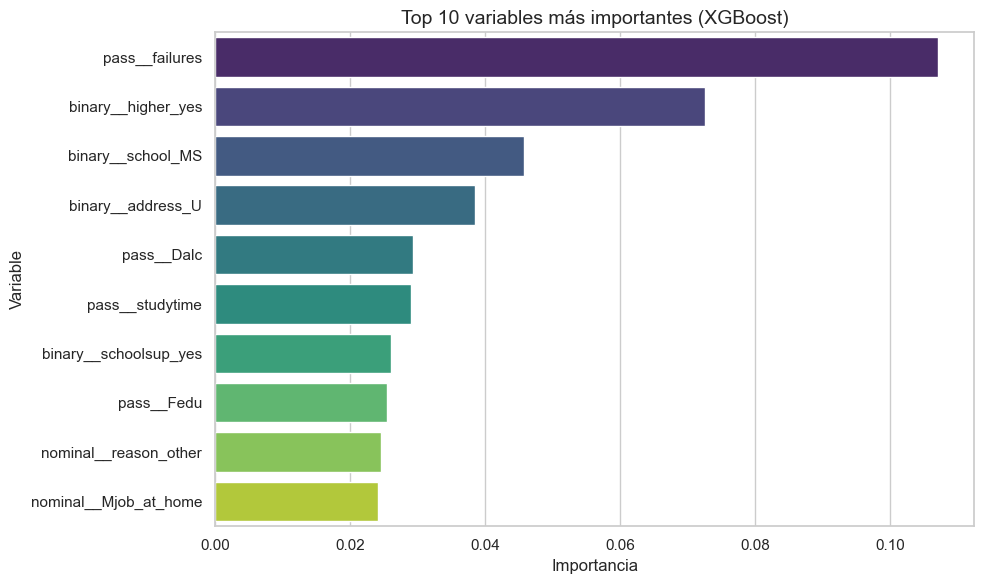

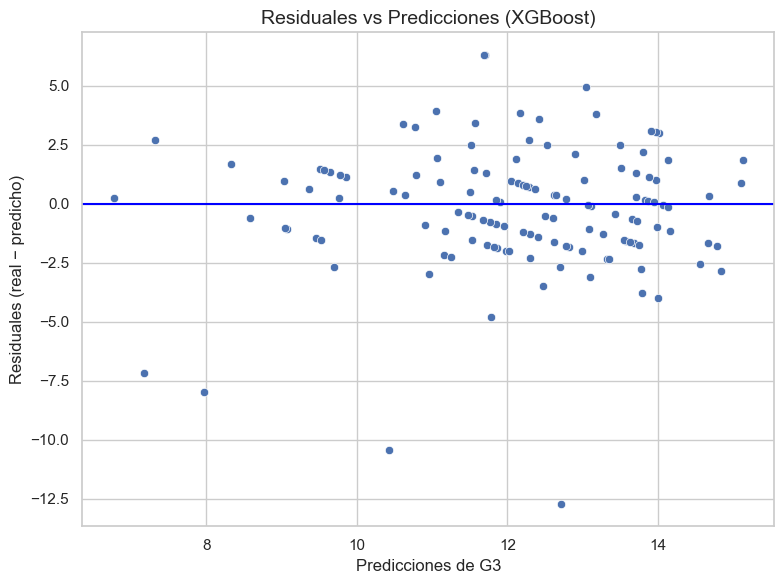

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------
# 1. Cargar datos y reservar un set test
# ------------------------------------------------
X = student_performance.data.features
y = student_performance.data.targets['G3']

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.20,
    random_state=73
)

# ------------------------------------------------
# 2. Columnas por tipo
# ------------------------------------------------
binary_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]
nominal_cat_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
ordinal_num_cols = [
    'Medu', 'Fedu', 'traveltime', 'studytime',
    'failures', 'famrel', 'freetime', 'goout',
    'Dalc', 'Walc', 'health'
]
numerical_cols = ['age', 'absences']

# ------------------------------------------------
# 3. Preprocesador usando OneHotEncoder y pipeline
# ------------------------------------------------
preprocessor = ColumnTransformer([
    ('binary',  OneHotEncoder(drop='if_binary', sparse=False), binary_cols),
    ('nominal', OneHotEncoder(sparse=False),             nominal_cat_cols),
    ('pass',    'passthrough',                           ordinal_num_cols + numerical_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor',    xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=73,
        n_estimators=1000  
    ))
])

# ------------------------------------------------
# 4. Espacio de búsqueda
# De aca se sacarán los hiperparámetros que arrojen mejores resultados
# ------------------------------------------------
param_dist = {
    'regressor__learning_rate':    [0.01, 0.03, 0.05, 0.1],
    'regressor__max_depth':        [3, 4, 5, 6],
    'regressor__subsample':        [0.5, 0.7, 0.8, 1.0],
    'regressor__colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'regressor__gamma':            [0.0, 0.1, 0.5, 1.0],
    'regressor__reg_alpha':        [0.0, 0.01, 0.1, 1.0],
    'regressor__reg_lambda':       [0.5, 1.0, 2.0, 5.0]
}

cv = KFold(n_splits=5, shuffle=True, random_state=73)
rand_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=cv,
    n_jobs=-1,
    random_state=73,
    verbose=1
)

rand_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
for k, v in rand_search.best_params_.items():
    print(f"  {k}: {v}")
print(f"R² CV estimado (mejor): {rand_search.best_score_:.3f}")

# ------------------------------------------------
# 5. Preparación de datos e implementación de xgb 
# usando early stopping para reducir sobreajuste
# ------------------------------------------------
# Ajustamos únicamente el preprocesador sobre X_train
X_train_tr = preprocessor.fit_transform(X_train)
X_val_tr   = preprocessor.transform(X_val)

# Sacamos los mejores parámetros para XGBRegressor
best_params = {
    k.replace('regressor__',''): v
    for k, v in rand_search.best_params_.items()
}

final_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=73,
    n_estimators=1000,
    **best_params,
    callbacks=[ xgb.callback.EarlyStopping(rounds=50, save_best=True) ]
)

final_xgb.fit(
    X_train_tr, y_train,
    eval_set=[(X_val_tr, y_val)],
    verbose=False
)

# ------------------------------------------------
# 6. Evaluación en el test
# ------------------------------------------------
y_val_pred = final_xgb.predict(X_val_tr)
print(f"R² en hold-out (20%): {r2_score(y_val, y_val_pred):.3f}")

# ------------------------------------------------
# 7. Importancias de las características y grafico
# ------------------------------------------------
feat_names = preprocessor.get_feature_names_out()
importances = pd.DataFrame({
    'feature': feat_names,
    'importance': final_xgb.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 variables más importantes:")
print(importances.head(10).to_string(index=False))

sns.set(style="whitegrid")

# Gráfico de importancias de variables (Top 10)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=importances.head(10),
    y="feature", x="importance",
    palette="viridis", ax=ax
)
ax.set_title("Top 10 variables más importantes (XGBoost)", fontsize=14)
ax.set_xlabel("Importancia")
ax.set_ylabel("Variable")
plt.tight_layout()
plt.show()

# ------------------------------------------------
# 8. Gráfico Residuales
# ------------------------------------------------
residuals = y_val - y_val_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val_pred, y=residuals)
plt.axhline(0, color='blue', linestyle='-')
plt.title("Residuales vs Predicciones (XGBoost)", fontsize=14)
plt.xlabel("Predicciones de G3")
plt.ylabel("Residuales (real − predicho)")
plt.tight_layout()
plt.show()

## Random Forest

Acierto promedio Mate : 0.7266
AUC promedio Mate     : 0.6994
Matriz de confusión para Mate:
[[ 47  83]
 [ 25 240]]

Acierto promedio Port : 0.8552
AUC promedio Port     : 0.8154
Matriz de confusión para Port:
[[ 17  83]
 [ 11 538]]


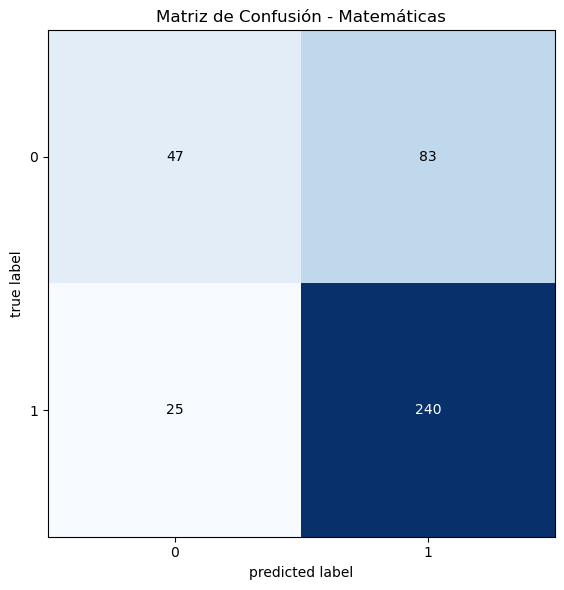

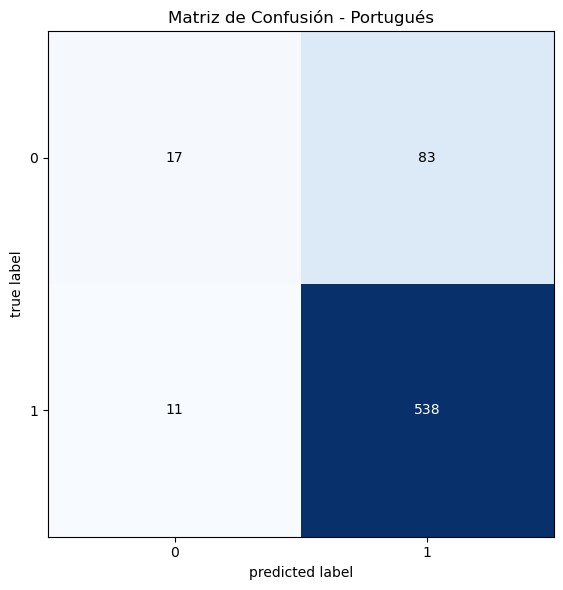

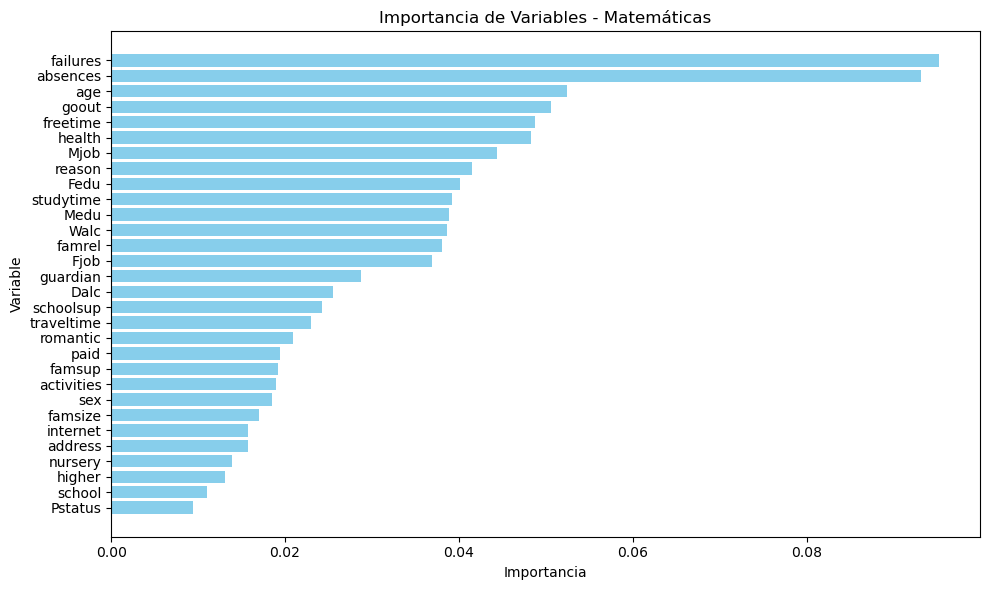

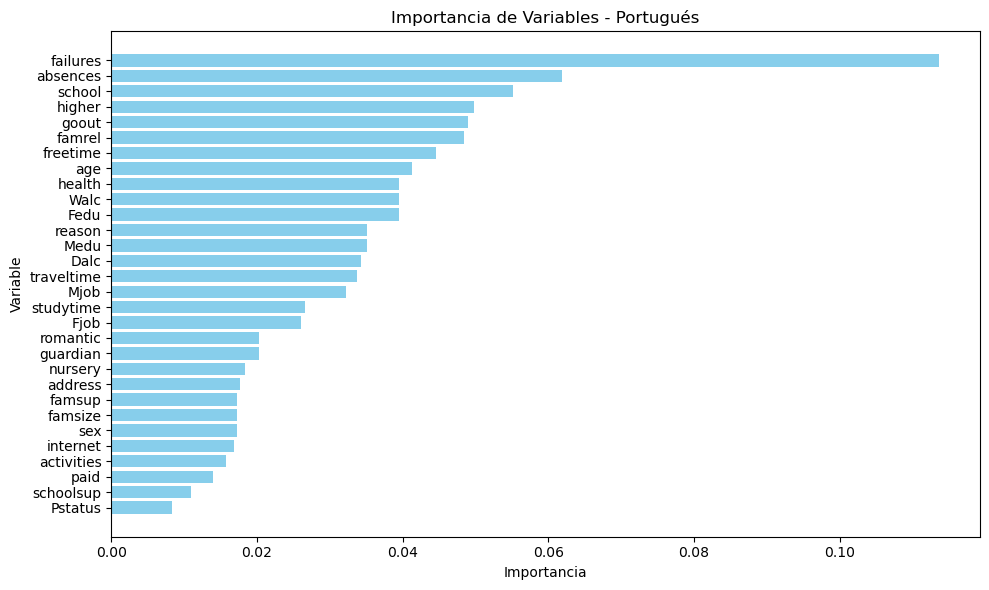

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix  # Nota: Esta es la función correcta

# Leer los datos
d1 = pd.read_csv("C:/Trabajos U/Análisis de datos/base/student-mat.csv", sep=";")
d2 = pd.read_csv("C:/Trabajos U/Análisis de datos/base/student-por.csv", sep=";")


data1 = d1.copy()
data2 = d2.copy()

# Crear variables objetivo binaria
data1["pasa_mate"] = (data1["G3"] >= 10).astype(int)
data2["pasa_port"] = (data2["G3"] >= 10).astype(int)

# Eliminar columnas de notas
data_clean1 = data1.drop(columns=["G1", "G2", "G3"])
data_clean2 = data2.drop(columns=["G1", "G2", "G3"])

# Codificar variables categóricas
data_encoded1 = data_clean1.copy()
data_encoded2 = data_clean2.copy()

for col in data_encoded1.select_dtypes(include="object").columns:
    data_encoded1[col] = LabelEncoder().fit_transform(data_encoded1[col])
    
for col in data_encoded2.select_dtypes(include="object").columns:
    data_encoded2[col] = LabelEncoder().fit_transform(data_encoded2[col])

# Separar variables predictoras y objetivo
X1 = data_encoded1.drop(columns="pasa_mate")
y1 = data_encoded1["pasa_mate"]

X2 = data_encoded2.drop(columns="pasa_port")
y2 = data_encoded2["pasa_port"]

# Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=20)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

# Evaluar para Matemáticas
accuracy_scores_1 = cross_val_score(modelo, X1, y1, cv=cv, scoring='accuracy')
auc_scores_1 = cross_val_score(modelo, X1, y1, cv=cv, scoring='roc_auc')
y1_pred_cv = cross_val_predict(modelo, X1, y1, cv=cv)
conf_matrix1 = confusion_matrix(y1, y1_pred_cv)

# Evaluar para Portugués
accuracy_scores_2 = cross_val_score(modelo, X2, y2, cv=cv, scoring='accuracy')
auc_scores_2 = cross_val_score(modelo, X2, y2, cv=cv, scoring='roc_auc')
y2_pred_cv = cross_val_predict(modelo, X2, y2, cv=cv)
conf_matrix2 = confusion_matrix(y2, y2_pred_cv)

# Resultados
print(f"Acierto promedio Mate : {accuracy_scores_1.mean():.4f}")
print(f"AUC promedio Mate     : {auc_scores_1.mean():.4f}")
print("Matriz de confusión para Mate:")
print(conf_matrix1)

print(f"\nAcierto promedio Port : {accuracy_scores_2.mean():.4f}")
print(f"AUC promedio Port     : {auc_scores_2.mean():.4f}")
print("Matriz de confusión para Port:")
print(conf_matrix2)


# 1. Matriz de confusión para Matemáticas
plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), show_normed=False)
plt.title("Matriz de Confusión - Matemáticas")
plt.tight_layout()
plt.show()
plt.close() 

# 2. Matriz de confusión para Portugués 
plot_confusion_matrix(conf_mat=conf_matrix2, figsize=(6, 6), show_normed=False)
plt.title("Matriz de Confusión - Portugués")
plt.tight_layout()
plt.show()
plt.close()




# 3. Importancia de variables Matemáticas
modelo.fit(X1, y1)  # Ajustar el modelo con los datos de Matemáticas para obtener importancias correctas
importancias = modelo.feature_importances_
variables = X1.columns

bosque_importancias = pd.DataFrame({
    "Feature": variables,
    "Importance": importancias  
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(bosque_importancias["Feature"], bosque_importancias["Importance"], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de Variables - Matemáticas')
plt.tight_layout()
plt.show()
plt.close()


# 4. Importancia de variables Portugués
modelo.fit(X2, y2)  # Ajustar el modelo con los datos de Portugués para obtener importancias correctas
importancias = modelo.feature_importances_
variables = X2.columns

bosque_importancias = pd.DataFrame({
    "Feature": variables,
    "Importance": importancias  
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(bosque_importancias["Feature"], bosque_importancias["Importance"], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de Variables - Portugués')
plt.tight_layout()
plt.show()
plt.close()